In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('dataset_elpino.csv', sep=";")
df.head()
df.shape

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 10: invalid continuation byte

In [ ]:
# Limpieza de los headers para que tenga solo los codigos

df_mod = df.copy()

for col in df_mod.columns:
  col = col.split("-")[0].strip()
  if col.startswith("Diag") or col.startswith("Proc"):
    nombre_col = col.split(" ")
    nombre_fin = nombre_col[0]+ nombre_col[1]
    df_mod = df_mod.rename(columns={col: nombre_fin})

df_mod["Sexo_bin"] = df_mod["Sexo (Desc)"].apply(lambda x: 0 if x=="Mujer" else 1)


df_mod = df_mod.applymap(lambda x: x.split('-')[0].strip() if isinstance(x,str) and x != "-" else x)

diag_cols = [col for col in df_mod.columns if 'Diag' in col]
proced_cols = [col for col in df_mod.columns if 'Proced' in col]
# Con esto podemos transformar los ' - ' en nulos, hay que ver si hacerlo
# lo hice, me canse del - xd
df_mod[diag_cols] = df_mod[diag_cols].replace('-', np.nan)
df_mod[proced_cols] = df_mod[proced_cols].replace('-', np.nan)

df_mod.shape
# df_mod es df pero con menos texto, solo con los identificadores de diagnostico, procedimiento y grd


C:\Users\Francisco\AppData\Local\Temp\ipykernel_32784\2220723612.py:15: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_mod = df_mod.applymap(lambda x: x.split('-')[0].strip() if isinstance(x,str) and x != "-" else x)


(14561, 69)

# Completitud

## Nulos

In [ ]:
### Completitud
#La completitud evalúa si faltan datos o si hay información incompleta. Aquí hay algunas maneras de evaluarla:
# a) Valores nulos o faltantes Revisa si hay valores NA, NULL, vacíos o marcadores especiales (como -9999, "?", etc.).
df_mod.isnull().sum()

Diag01              0
Diag02           1209
Diag03           2687
Diag04           4127
Diag05           5371
                ...  
Proced30        13498
Edad en años        0
Sexo (Desc)         0
GRD                 0
Sexo_bin            0
Length: 69, dtype: int64

## Analisis nulos y duplicados

In [ ]:
# Tiene varios valores nulos, los que son esperados ya que se les realiza una
# cantidad distinta de diagnosticos y procedimientos a cada persona
# Entonces, no tenemos razon para tratar estos nulos o faltantes
i= 0
for col in df_mod.columns:
  nulos = df_mod[col].isna().sum()
  if nulos == df_mod.shape[0]:
    i+=1
    print(col, nulos)
print(f"Cant de columnas totalmente vacias: {i}")
# No hay columnas totalmente vacias
void_rows = df_mod[df_mod.isnull().all(axis=1)]
print(f"Cant de rows totalmente vacias: {void_rows.shape[0]}")
# No hay filas totalmente vacias

# Ademas las columnas de edad, sexo, y grd no tienen ningun registro vacio
# lo cual es importasnte

## Duplicados
dupes = df_mod[df_mod.duplicated(keep=False)]
dupes

dupes_sobre_0 = dupes[dupes["Edad en años"] > 0]
dupes_sobre_0

# Tipos de duplicado
# 1) El principal son los bebes recien nacidos, a lo que se les realiza una revision general,
# estos se mantienen porque son procedimientos y diagnosticos esperados de un recien nacido
# 2) El segundo son los partos que tienen los diagnosticos O34.2 	O82.0 	Z37.0 	Z38.0 	Z39.0 	Z39.1 	Z39.2,
# los que sugieren que durante el parte sucedio un desgarro o complicaciones, lo cual consideramos sigue un comportamiento regular
# y ademas se repite en distintas edades y en registros distanciados, por lo cual lo mantenemos
# 3) el tercero es en un bebe de 1 año que los diagnosticos sugieren que se cayo fuerte, algo que podria pasar en mas de una ocasion
# sobretodo en un infante de 1 año
# 4) el ultimo es el caso de una extirpacion de un tejido cicatrizado o fibrosis, siendo procedimiento ambulatoreios
# normales, los cuales no seran eliminados



Cant de columnas totalmente vacias: 0
Cant de rows totalmente vacias: 0


,Diag01,Diag02,Diag03,Diag04,Diag05,Diag06,Diag07,Diag08,Diag09,Diag10,...,Proced25,Proced26,Proced27,Proced28,Proced29,Proced30,Edad en años,Sexo (Desc),GRD,Sexo_bin
1476,O34.2,O82.0,Z37.0,Z38.0,Z39.0,Z39.1,Z39.2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,25,Mujer,146101,0
4576,O70.0,O80.0,Z37.0,Z38.0,Z39.0,Z39.1,Z39.2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,34,Mujer,146121,0
4646,O70.0,O80.0,Z37.0,Z38.0,Z39.0,Z39.1,Z39.2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23,Mujer,146121,0
5161,O70.0,O80.0,Z37.0,Z38.0,Z39.0,Z39.1,Z39.2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,34,Mujer,146121,0
5664,L90.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41,Mujer,091401,0
7484,O70.0,O80.0,Z37.0,Z38.0,Z39.0,Z39.1,Z39.2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23,Mujer,146121,0
8117,O34.2,O82.0,Z37.0,Z38.0,Z39.0,Z39.1,Z39.2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,31,Mujer,146101,0
8529,O34.2,O82.0,Z37.0,Z38.0,Z39.0,Z39.1,Z39.2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,31,Mujer,146101,0
9658,S00.9,W06.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,Hombre,094131,1
9947,L90.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41,Mujer,091401,0


# Correctitud

## Formato y tipo de dato

In [ ]:
#La correctitud verifica si los datos que sí están presentes son correctos o válidos.
# a) Formato y tipo de dato
df_mod.dtypes
# Todos siguen los formatos correctos

Diag01          object
Diag02          object
Diag03          object
Diag04          object
Diag05          object
                 ...  
Proced30        object
Edad en años     int64
Sexo (Desc)     object
GRD             object
Sexo_bin         int64
Length: 69, dtype: object

## Fuera de rango

In [ ]:
# Valores fuera de rango

edad_mala = df_mod[df_mod["Edad en años"] < 0]
edad_mala

,Diag01,Diag02,Diag03,Diag04,Diag05,Diag06,Diag07,Diag08,Diag09,Diag10,...,Proced25,Proced26,Proced27,Proced28,Proced29,Proced30,Edad en años,Sexo (Desc),GRD,Sexo_bin


In [ ]:
# sexo mal definido
sexo_mal_def = df_mod[~df_mod["Sexo (Desc)"].isin(["Hombre", "Mujer"])]
sexo_mal_def


,Diag01,Diag02,Diag03,Diag04,Diag05,Diag06,Diag07,Diag08,Diag09,Diag10,...,Proced25,Proced26,Proced27,Proced28,Proced29,Proced30,Edad en años,Sexo (Desc),GRD,Sexo_bin


In [ ]:
# Los datos estan bien definidos

# Outliers


## Outliers edad

Estadístico: 0.06742433176661289, pvalue 5.345377429029912e-58
Limite interior: -32.5
Limite superior: 115.5
     Diag01 Diag02 Diag03 Diag04 Diag05 Diag06 Diag07 Diag08 Diag09 Diag10  \
2588  Z76.2  P07.3    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

      ... Proced25 Proced26 Proced27 Proced28 Proced29 Proced30 Edad en años  \
2588  ...      NaN      NaN      NaN      NaN      NaN      NaN          121   

     Sexo (Desc)     GRD Sexo_bin  
2588       Mujer  224121        0  

[1 rows x 69 columns]


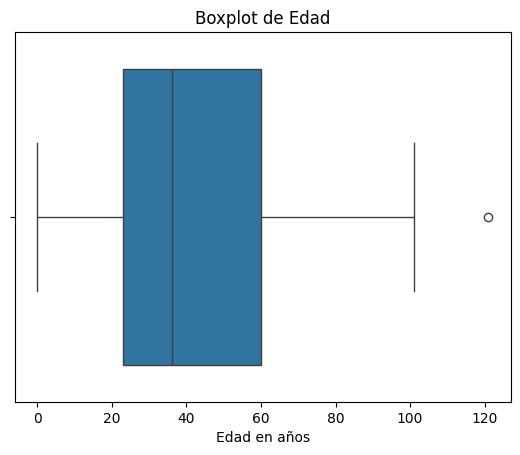

In [ ]:
import scipy.stats as stats
import seaborn as sns
from scipy.stats import kstest

pd.set_option('display.max_rows', None)
### Outliers
## Primero, edad

# Ver si en dist normal
df_mod["Edad en años"].value_counts()
norm = (df_mod["Edad en años"] - df_mod["Edad en años"].mean()) / df_mod["Edad en años"].std()
estadistico, p_value = kstest(norm, 'norm')
print(f'Estadístico: {estadistico}, pvalue {p_value}')
# No lo es
# Usamos iqr para los outliers

edades = df_mod['Edad en años']
q1_edades = edades.quantile(0.25)
q3_edades = edades.quantile(0.75)
iqr_edades = q3_edades - q1_edades

limite_interior = q1_edades - 1.5 * iqr_edades
limite_superior = q3_edades + 1.5 * iqr_edades

outliers_edades = df_mod[(edades < limite_interior) | (edades > limite_superior)]


print('Limite interior:', limite_interior)
print('Limite superior:', limite_superior)
print(outliers_edades)


sns.boxplot(x=df['Edad en años'])
plt.title('Boxplot de Edad')
plt.show()


# La mitica vieja de 121 es outlier
# Se elimina ya que con examinacion mas profunda, los diagnosticos y procedimientos
# no coinciden con lo que deberia ser



## Outliers cant diag y proced

Limite inferior Diag: 

 -7.5
Limite superior Diag:  20.5
Limite inferior Proced:  -4.0
Limite superior Proced:  28.0
(353, 71) 65.5042492917847
(1182, 71) 61.69458544839255


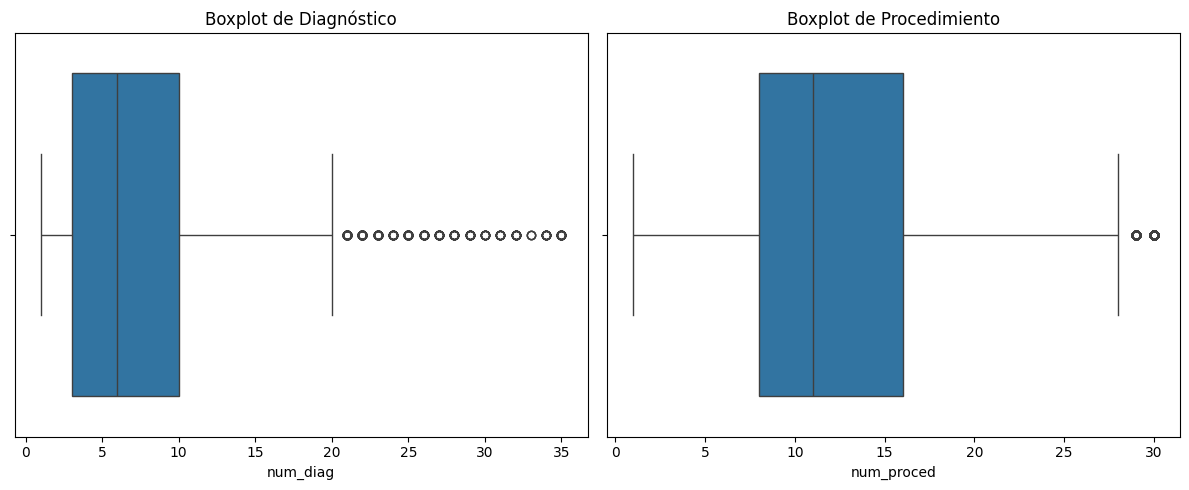

In [ ]:
## Diagnosticos y Procedimiento

# IDEA: Ver la cantidad de diagnosticos y proced de cada fila, contarlos
# y luego ver outliers asi

df_mod['num_diag'] = df_mod[diag_cols].notna().sum(axis=1)
df_mod['num_proced'] = df_mod[proced_cols].notna().sum(axis=1)
df_mod.head()

num_diag = df_mod['num_diag']
q1_diag = num_diag.quantile(0.25)
q3_diag = num_diag.quantile(0.75)
iqr_diag = q3_diag - q1_diag
limite_interior_diag = q1_diag - 1.5 * iqr_diag
limite_superior_diag = q3_diag + 1.5 * iqr_diag

num_proced = df_mod['num_proced']
q1_proced = num_proced.quantile(0.25)
q3_proced = num_proced.quantile(0.75)
iqr_proced = q3_proced - q1_proced
limite_interior_proced = q1_proced - 1.5 * iqr_proced
limite_superior_proced = q3_proced + 1.5 * iqr_proced

print("Limite inferior Diag: ", limite_interior_diag)
print("Limite superior Diag: ", limite_superior_diag)
print("Limite inferior Proced: ", limite_interior_proced)
print("Limite superior Proced: ", limite_superior_proced)
outlier_num_diag = df_mod[(num_diag < limite_interior_diag) | (num_diag > limite_superior_diag)]
outlier_num_proced = df_mod[(num_proced < limite_interior_proced) | (num_proced > limite_superior_proced)]

print(outlier_num_diag.shape, outlier_num_diag['Edad en años'].mean())
print(outlier_num_proced.shape, outlier_num_proced['Edad en años'].mean())
#print("Outlier diagnostico, count edad", outlier_num_diag['Edad en años'].value_counts())
#print("Outlier procedimiento, count edad", outlier_num_proced['Edad en años'].value_counts())

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.boxplot(x=num_diag, ax=axes[0])
axes[0].set_title('Boxplot de Diagnóstico')
sns.boxplot(x=num_proced, ax=axes[1])
axes[1].set_title('Boxplot de Procedimiento')
plt.tight_layout()
plt.show()

#df_mod["num_diag"].value_counts()
#df_mod["num_proced"].value_counts()

## GRD
# En mi opinion no tiene sentido revisar outliers de aqui por que nuestro
# objetivo de prediccion y ademas tienen un significado peculiar los codigos


## Extrayendo los outliers del dataset, creando df_mod_clean

In [ ]:
outliers_edades
#df mod clean es el df modificado para ser mas corto, y sacandole los outliers
df_mod_clean = df_mod.copy()

outliers_index = outliers_edades.index.union(outlier_num_diag.index).union(outlier_num_proced.index)
df_mod_clean = df_mod_clean.drop(outliers_index)


print("Cant outliers a eliminar: ", outliers_index.shape)
#df_mod_clean = df_mod_clean.drop(outlier_num_diag.index)
#df_mod_clean = df_mod_clean.drop(outlier_num_proced.index)
#df_mod_clean = df_mod_clean.drop(outliers_edades.index)

print(f"Shape df clean {df_mod_clean.shape}")
print(f"Shape df normal {df_mod.shape}")

test_sin_digito = df_mod_clean
test_sin_digito['GRD'] = test_sin_digito['GRD'].astype(str).str[:-1]
test_sin_digito.head()

Cant outliers a eliminar:  (1245,)
Shape df clean (13316, 71)
Shape df normal (14561, 71)


,Diag01,Diag02,Diag03,Diag04,Diag05,Diag06,Diag07,Diag08,Diag09,Diag10,...,Proced27,Proced28,Proced29,Proced30,Edad en años,Sexo (Desc),GRD,Sexo_bin,num_diag,num_proced
12,F20.6,F14.2,F10.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,30,Mujer,19410,0,3,19
15,I20.0,I25.1,I50.0,I70.20,I65.2,I70.80,I77.8,I25.2,I10,U07.1,...,NaN,NaN,NaN,NaN,69,Hombre,05420,1,16,24
20,P22.1,P28.4,Q21.1,P61.2,P03.4,P02.1,P59.0,P07.3,Z59.7,Z65.3,...,NaN,NaN,NaN,NaN,0,Mujer,15812,0,10,24
26,D64.8,D70,D69.6,N30.8,R31,K72.1,K62.8,C53.9,E87.5,E11.9,...,89.7,90.59,NaN,NaN,47,Mujer,16413,0,15,28
32,K86.8,U07.1,Z88.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,36,Mujer,07412,0,3,24


# Estadisticas descriptivas

In [ ]:
### Estadisticas descriptivas
# Datos numericos

df_mod_clean.head()
#df_mod_clean.describe()

,Diag01,Diag02,Diag03,Diag04,Diag05,Diag06,Diag07,Diag08,Diag09,Diag10,...,Proced27,Proced28,Proced29,Proced30,Edad en años,Sexo (Desc),GRD,Sexo_bin,num_diag,num_proced
12,F20.6,F14.2,F10.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,30,Mujer,19410,0,3,19
15,I20.0,I25.1,I50.0,I70.20,I65.2,I70.80,I77.8,I25.2,I10,U07.1,...,NaN,NaN,NaN,NaN,69,Hombre,05420,1,16,24
20,P22.1,P28.4,Q21.1,P61.2,P03.4,P02.1,P59.0,P07.3,Z59.7,Z65.3,...,NaN,NaN,NaN,NaN,0,Mujer,15812,0,10,24
26,D64.8,D70,D69.6,N30.8,R31,K72.1,K62.8,C53.9,E87.5,E11.9,...,89.7,90.59,NaN,NaN,47,Mujer,16413,0,15,28
32,K86.8,U07.1,Z88.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,36,Mujer,07412,0,3,24


### Medidas de tendencia central y dispersion

In [ ]:

from scipy.stats import skew, kurtosis
## Tendencia central
# moda, listo
# mediana, listo
# moda, listo

mode = df_mod_clean.mode(numeric_only=True)
print("Moda \n", mode)
median =df_mod_clean.median(numeric_only=True)
print("Mediana \n", median)

## Dispersion
# desv std, listo
# min, listo
# max, listo
# iqr

edad = df_mod_clean["Edad en años"]
sexo_bin = df_mod_clean["Sexo_bin"]
num_diag = df_mod_clean["num_diag"]
num_proced = df_mod_clean["num_proced"]

cosas = [edad, sexo_bin, num_diag, num_proced]
print()
for cosa in cosas:
  rango = cosa.max() - cosa.min()
  varianza = cosa.var()
  iqr = cosa.quantile(0.75) - cosa.quantile(0.25)
  asimetria = skew(cosa)
  curtosis = kurtosis(cosa, fisher=True)
  print("Estadisticos ", cosa.name)
  print(f"Rango {cosa.name}: {rango}")
  print(f"Varianza {cosa.name}: {varianza}")
  print(f"IQR {cosa.name}: {iqr}")
  print(f"Asimetria {cosa.name}: {asimetria}")
  print(f"Curtosis {cosa.name}: {curtosis}")
  print("\n")


# Descr general
# tenemos 133316 registros
#df_mod_clean.shape

Moda 
    Edad en años  Sexo_bin  num_diag  num_proced
0             0         0         2          11
Mediana 
 Edad en años    34.0
Sexo_bin         0.0
num_diag         6.0
num_proced      11.0
dtype: float64

Estadisticos  Edad en años
Rango Edad en años: 101
Varianza Edad en años: 581.1866881997291
IQR Edad en años: 34.0
Asimetria Edad en años: 0.22157187962733607
Curtosis Edad en años: -0.751063710991752


Estadisticos  Sexo_bin
Rango Sexo_bin: 1
Varianza Sexo_bin: 0.2179367481142684
IQR Sexo_bin: 1.0
Asimetria Sexo_bin: 0.7673538337294398
Curtosis Sexo_bin: -1.4111680938607312


Estadisticos  num_diag
Rango num_diag: 19
Varianza num_diag: 15.513958519714382
IQR num_diag: 6.0
Asimetria num_diag: 0.660370209305006
Curtosis num_diag: -0.056649433588984444


Estadisticos  num_proced
Rango num_proced: 27
Varianza num_proced: 31.824171018644176
IQR num_proced: 6.0
Asimetria num_proced: 0.7625549292586463
Curtosis num_proced: 0.4222742635886525




### Histogramas de las variables

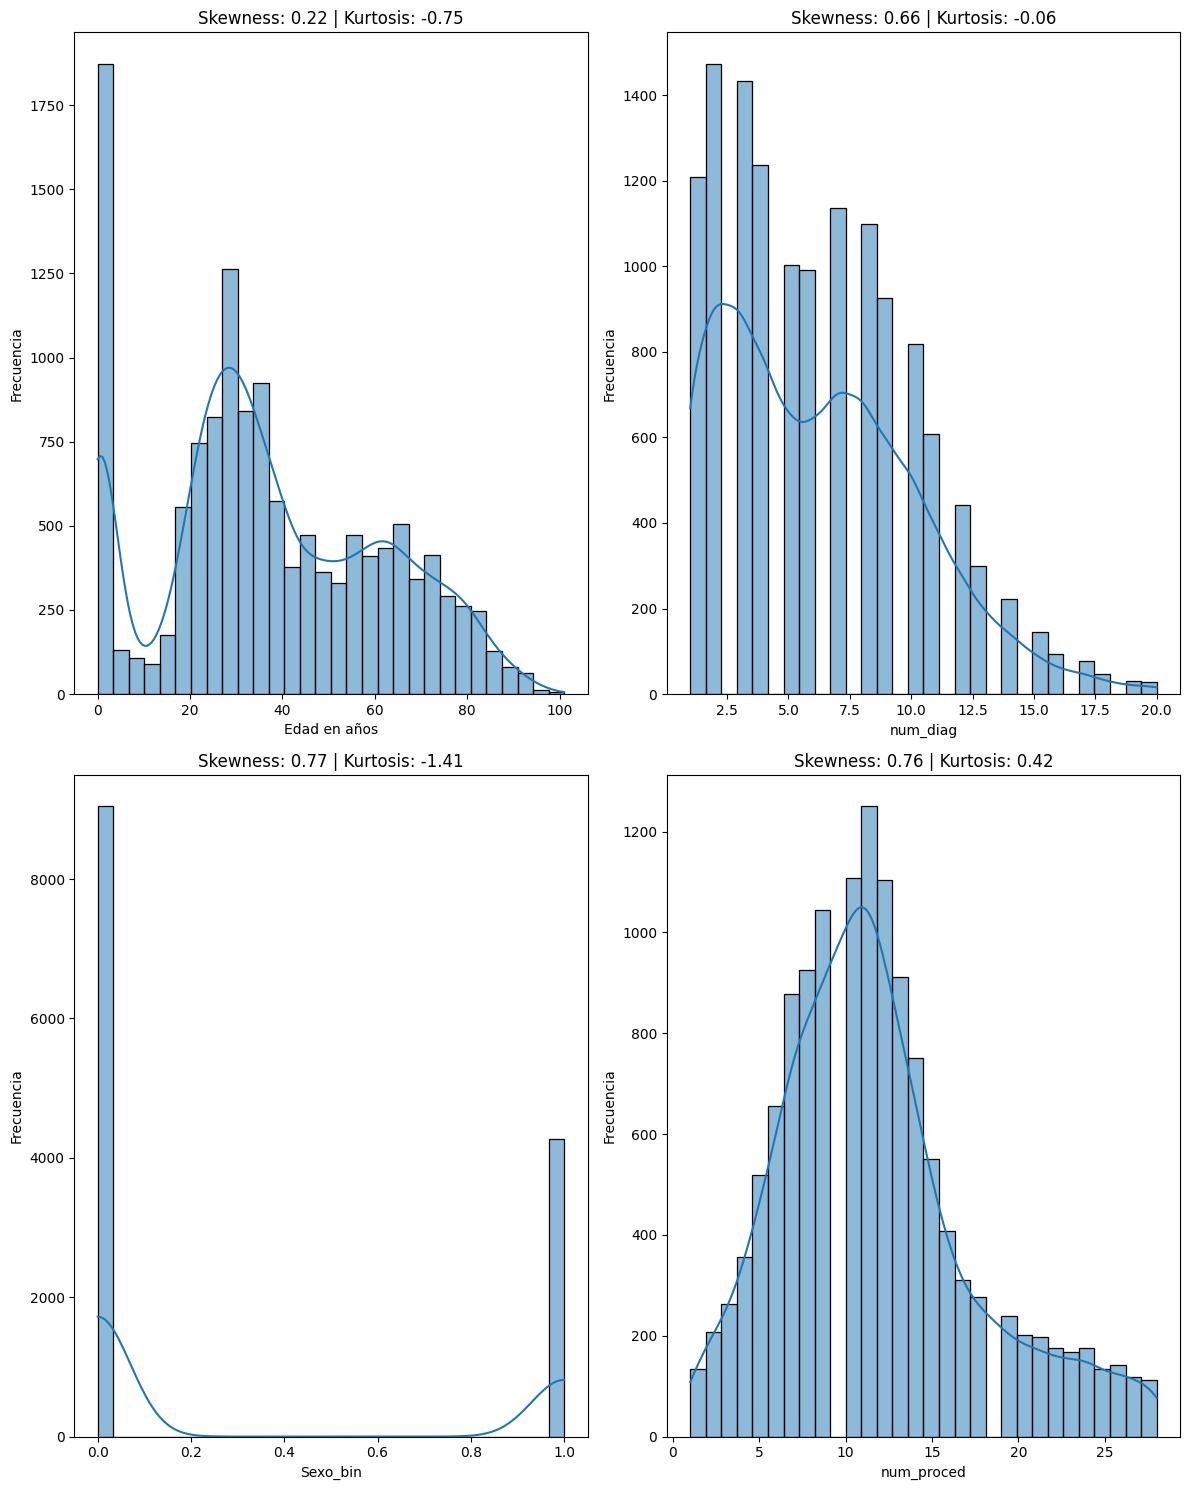

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12,15))
i=0
j=0
for cosa in cosas:
  sns.histplot(cosa, kde=True, bins=30, ax=axes[i][j])
  axes[i][j].set_title(f"Skewness: {skew(cosa):.2f} | Kurtosis: {kurtosis(cosa, fisher=True):.2f}")
  axes[i][j].set_xlabel(cosa.name)
  axes[i][j].set_ylabel("Frecuencia")
  i+=1
  if i==2:
    i=0
    j+=1

plt.tight_layout()
plt.show()

# Modelos

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import label_binarize

df_mod_clean.head()


,Diag01,Diag02,Diag03,Diag04,Diag05,Diag06,Diag07,Diag08,Diag09,Diag10,...,Proced27,Proced28,Proced29,Proced30,Edad en años,Sexo (Desc),GRD,Sexo_bin,num_diag,num_proced
12,F20.6,F14.2,F10.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,30,Mujer,19410,0,3,19
15,I20.0,I25.1,I50.0,I70.20,I65.2,I70.80,I77.8,I25.2,I10,U07.1,...,NaN,NaN,NaN,NaN,69,Hombre,05420,1,16,24
20,P22.1,P28.4,Q21.1,P61.2,P03.4,P02.1,P59.0,P07.3,Z59.7,Z65.3,...,NaN,NaN,NaN,NaN,0,Mujer,15812,0,10,24
26,D64.8,D70,D69.6,N30.8,R31,K72.1,K62.8,C53.9,E87.5,E11.9,...,89.7,90.59,NaN,NaN,47,Mujer,16413,0,15,28
32,K86.8,U07.1,Z88.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,36,Mujer,07412,0,3,24


### Agregar nuevas columnas, definir vocabularios y separar datos

In [ ]:
## Creacion de vectores de los diag secundarios y proced secundarios
diag_sec = diag_cols[1:]
proced__sec = proced_cols[1:]
# Columna nueva diag secundarios, [diag02, diag03]
# columna nueva proced seucdarios
#df_mod_clean["Diag Secundarios"] = []

# Creacion de nuevas columnas para los secundarios, una lista con cada diag o proced
df_mod_clean['DiagSecundarios'] = df_mod_clean[diag_sec].apply(lambda row:[x for x in row if not pd.isna(x)], axis=1)
df_mod_clean['ProcedSecundarios'] = df_mod_clean[proced__sec].apply(lambda row:[x for x in row if not pd.isna(x)], axis=1)

df_mod_clean.head()


,Diag01,Diag02,Diag03,Diag04,Diag05,Diag06,Diag07,Diag08,Diag09,Diag10,...,Proced29,Proced30,Edad en años,Sexo (Desc),GRD,Sexo_bin,num_diag,num_proced,DiagSecundarios,ProcedSecundarios
12,F20.6,F14.2,F10.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,30,Mujer,19410,0,3,19,"[F14.2, F10.2]","[87.44, 88.76, 99.26, 99.29, 90.59, 89.66, 90...."
15,I20.0,I25.1,I50.0,I70.20,I65.2,I70.80,I77.8,I25.2,I10,U07.1,...,NaN,NaN,69,Hombre,05420,1,16,24,"[I25.1, I50.0, I70.20, I65.2, I70.80, I77.8, I...","[88.72, 89.52, 88.71, 88.77, 87.44, 90.39, 90...."
20,P22.1,P28.4,Q21.1,P61.2,P03.4,P02.1,P59.0,P07.3,Z59.7,Z65.3,...,NaN,NaN,0,Mujer,15812,0,10,24,"[P28.4, Q21.1, P61.2, P03.4, P02.1, P59.0, P07...","[88.71, 88.72, 89.50, 88.79, 99.83, 95.11, 95...."
26,D64.8,D70,D69.6,N30.8,R31,K72.1,K62.8,C53.9,E87.5,E11.9,...,NaN,NaN,47,Mujer,16413,0,15,28,"[D70, D69.6, N30.8, R31, K72.1, K62.8, C53.9, ...","[57.32, 45.23, 45.13, 88.01, 87.41, 87.37, 90...."
32,K86.8,U07.1,Z88.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,36,Mujer,07412,0,3,24,"[U07.1, Z88.8]","[88.38, 96.59, 99.84, 99.18, 99.19, 99.21, 99...."


In [ ]:
# Vocabulario CIE9
import string

df_cie9 = pd.read_excel('CIE-9.xlsx', dtype={'Código': str})
X = []
vocabulario_proced = {}
for linea in df_cie9["Código"]:
    if "." in linea:
        text = linea.split(".")
        cod_principal = text[0]
        cod_sub = "." + text[1]
        message = [cod_principal, cod_sub]
        X.append(message)

        for palabra in message:
            vocabulario_proced[palabra] = vocabulario_proced.get(palabra, 0) + 1

    else:
        message = [linea]
        X.append(message)
        for palabra in message:
            vocabulario_proced[palabra] = vocabulario_proced.get(palabra, 0) + 1

#print(len(vocabulario))
#print(vocabulario)
print(vocabulario_proced)


{'00': 89, '.0': 99, '.01': 64, '.02': 52, '.03': 39, '.09': 48, '.1': 100, '.10': 17, '.11': 76, '.12': 58, '.13': 41, '.14': 38, '.15': 29, '.16': 26, '.17': 19, '.18': 17, '.19': 62, '.2': 99, '.21': 77, '.22': 67, '.23': 54, '.24': 49, '.25': 39, '.28': 22, '.29': 64, '.3': 98, '.31': 67, '.32': 57, '.33': 43, '.34': 36, '.35': 32, '.39': 56, '.4': 96, '.40': 16, '.41': 67, '.42': 61, '.43': 47, '.44': 34, '.45': 27, '.46': 22, '.47': 15, '.48': 14, '.49': 49, '.5': 90, '.50': 20, '.51': 68, '.52': 57, '.53': 42, '.54': 34, '.55': 27, '.56': 19, '.57': 14, '.58': 11, '.59': 53, '.6': 85, '.60': 15, '.61': 54, '.62': 50, '.63': 43, '.64': 39, '.65': 27, '.66': 23, '.67': 15, '.68': 14, '.69': 40, '.7': 74, '.70': 16, '.71': 61, '.72': 56, '.73': 43, '.74': 35, '.75': 32, '.76': 24, '.77': 14, '.8': 60, '.80': 14, '.81': 47, '.82': 42, '.83': 37, '.84': 34, '.85': 33, '.86': 27, '.87': 20, '.9': 88, '.91': 75, '.92': 66, '.93': 59, '.94': 51, '.95': 46, '01': 40, '.20': 18, '.26': 30

In [ ]:
#Vocabulario CIE-10
df_cie10 = pd.read_excel("CIE-10.xlsx")
df_cie10.head()

def asignador(elemento : str, dict):
    elemento = str(elemento)
    if elemento in dict:
        dict[elemento]+=1
    else:
        dict[elemento]=1


vocabulario_diag = {}
for _, codigo in df_cie10['Código'].items():
    letra = codigo[0]
    numeros = codigo[1:]
    if '.' in numeros:
        partes = numeros.split('.')
        partes[-1] = "."+partes[-1]
        for parte in partes:
            asignador(parte, vocabulario_diag)
    else:
        asignador(numeros,vocabulario_diag)

    asignador(letra, vocabulario_diag)

print(vocabulario_diag)

{'00': 425, 'A': 461, '.0': 1785, '.1': 1680, '.9': 1462, '01': 482, '.2': 1444, '.3': 1231, '.4': 1034, '02': 512, '.8': 1411, '03': 443, '04': 421, '.5': 873, '.6': 713, '.7': 683, '05': 470, '06': 466, '07': 291, '08': 399, '09': 392, '15': 409, '16': 399, '17': 387, '18': 395, '19': 425, '20': 431, '21': 494, '22': 450, '23': 519, '24': 498, '25': 542, '26': 408, '27': 414, '28': 394, '30': 442, '31': 450, '32': 432, '33': 407, '34': 341, '35': 370, '36': 371, '37': 352, '38': 318, '39': 326, '40': 423, '41': 444, '42': 387, '43': 458, '44': 384, '46': 420, '48': 329, '49': 389, '50': 385, '51': 375, '52': 381, '53': 376, '54': 409, '55': 232, '56': 256, '57': 334, '58': 303, '59': 315, '60': 428, '63': 289, '64': 326, '65': 408, '66': 394, '67': 343, '68': 319, '69': 307, '70': 414, '71': 360, '74': 361, '75': 346, '77': 351, '78': 317, '79': 406, '80': 462, '81': 469, '82': 346, '83': 488, '84': 433, '85': 437, '86': 421, '87': 405, '88': 346, '89': 394, '90': 465, '91': 370, '92

In [ ]:
# Separacion en DiagSecundarios, pasar de formato A11.2 a A, 11, .2
for i, lista in df_mod_clean['DiagSecundarios'].items():
    registro_nuevo = []
    for item in lista:
        new_items = []
        letra = item[0]
        numeros = item[1:]
        new_items.append(letra)
        if '.' in numeros:
            partes = numeros.split('.')
            partes[-1] = "."+partes[-1]
            new_items.append(partes[0])
            new_items.append(partes[-1])
        else:
            new_items.append(numeros)
        registro_nuevo.extend(new_items)

    df_mod_clean.at[i, 'DiagSecundarios'] = registro_nuevo

df_mod_clean.head()
# No correr 2 veces, ya se corrio esta wea


,Diag01,Diag02,Diag03,Diag04,Diag05,Diag06,Diag07,Diag08,Diag09,Diag10,...,Proced29,Proced30,Edad en años,Sexo (Desc),GRD,Sexo_bin,num_diag,num_proced,DiagSecundarios,ProcedSecundarios
12,F20.6,F14.2,F10.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,30,Mujer,19410,0,3,19,"[F, 14, .2, F, 10, .2]","[87.44, 88.76, 99.26, 99.29, 90.59, 89.66, 90...."
15,I20.0,I25.1,I50.0,I70.20,I65.2,I70.80,I77.8,I25.2,I10,U07.1,...,NaN,NaN,69,Hombre,05420,1,16,24,"[I, 25, .1, I, 50, .0, I, 70, .20, I, 65, .2, ...","[88.72, 89.52, 88.71, 88.77, 87.44, 90.39, 90...."
20,P22.1,P28.4,Q21.1,P61.2,P03.4,P02.1,P59.0,P07.3,Z59.7,Z65.3,...,NaN,NaN,0,Mujer,15812,0,10,24,"[P, 28, .4, Q, 21, .1, P, 61, .2, P, 03, .4, P...","[88.71, 88.72, 89.50, 88.79, 99.83, 95.11, 95...."
26,D64.8,D70,D69.6,N30.8,R31,K72.1,K62.8,C53.9,E87.5,E11.9,...,NaN,NaN,47,Mujer,16413,0,15,28,"[D, 70, D, 69, .6, N, 30, .8, R, 31, K, 72, .1...","[57.32, 45.23, 45.13, 88.01, 87.41, 87.37, 90...."
32,K86.8,U07.1,Z88.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,36,Mujer,07412,0,3,24,"[U, 07, .1, Z, 88, .8]","[88.38, 96.59, 99.84, 99.18, 99.19, 99.21, 99...."


In [ ]:
# Separacion en ProcedSecundarios, pasar de formato 11.22 a 11, .22

for i, linea in df_mod_clean["ProcedSecundarios"].items():
    message = []
    for codigo in linea:
        text = codigo.split(".")
        cod_principal = text[0]
        cod_sub = "." + text[1]
        message.append(cod_principal)
        message.append(cod_sub)
    df_mod_clean.at[i, 'ProcedSecundarios'] = message

df_mod_clean.head()
# No correr 2 veces, ya se corrio esta wea



,Diag01,Diag02,Diag03,Diag04,Diag05,Diag06,Diag07,Diag08,Diag09,Diag10,...,Proced29,Proced30,Edad en años,Sexo (Desc),GRD,Sexo_bin,num_diag,num_proced,DiagSecundarios,ProcedSecundarios
12,F20.6,F14.2,F10.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,30,Mujer,19410,0,3,19,"[F, 14, .2, F, 10, .2]","[87, .44, 88, .76, 99, .26, 99, .29, 90, .59, ..."
15,I20.0,I25.1,I50.0,I70.20,I65.2,I70.80,I77.8,I25.2,I10,U07.1,...,NaN,NaN,69,Hombre,05420,1,16,24,"[I, 25, .1, I, 50, .0, I, 70, .20, I, 65, .2, ...","[88, .72, 89, .52, 88, .71, 88, .77, 87, .44, ..."
20,P22.1,P28.4,Q21.1,P61.2,P03.4,P02.1,P59.0,P07.3,Z59.7,Z65.3,...,NaN,NaN,0,Mujer,15812,0,10,24,"[P, 28, .4, Q, 21, .1, P, 61, .2, P, 03, .4, P...","[88, .71, 88, .72, 89, .50, 88, .79, 99, .83, ..."
26,D64.8,D70,D69.6,N30.8,R31,K72.1,K62.8,C53.9,E87.5,E11.9,...,NaN,NaN,47,Mujer,16413,0,15,28,"[D, 70, D, 69, .6, N, 30, .8, R, 31, K, 72, .1...","[57, .32, 45, .23, 45, .13, 88, .01, 87, .41, ..."
32,K86.8,U07.1,Z88.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,36,Mujer,07412,0,3,24,"[U, 07, .1, Z, 88, .8]","[88, .38, 96, .59, 99, .84, 99, .18, 99, .19, ..."


### Tokenizar vocabulario, diag secundarios, proced segundarios, diag01 y proced01

In [ ]:
# Importaciones importantes
from keras.models import Sequential
import numpy as np
from sklearn.model_selection import train_test_split
from keras.layers import SimpleRNN, Dense, Input, LSTM, GRU
import pandas as pd
import string
import datetime
import tensorflow as tf

In [ ]:
# Copia del df utilizado, incluyendo las versiones token de ciertas columnas
df_mod_clean_token = df_mod_clean.copy()


In [ ]:
# Vocabularios finales pero en tokens, este es el de diag

# Ordenamos por frecuencia (opcional)
tokens_ordenados_diag = sorted(vocabulario_diag.items(), key=lambda x: x[1], reverse=True)

# Asignamos índices (empezando desde 2, porque 0 = padding, 1 = <OOV>)
vocabulario_final_diag = {token: idx+2 for idx, (token, _) in enumerate(tokens_ordenados_diag)}

# Agregamos manualmente padding y OOV si quieres
vocabulario_final_diag['<PAD>'] = 0
vocabulario_final_diag['<OOV>'] = 1

print(vocabulario_final_diag)

{'X': 2, 'W': 3, 'V': 4, 'M': 5, 'Y': 6, '.0': 7, '.1': 8, '.9': 9, '.2': 10, '.8': 11, '.3': 12, '.4': 13, 'S': 14, '.5': 15, 'T': 16, '.6': 17, 'Z': 18, 'Q': 19, '.7': 20, '25': 21, 'C': 22, 'D': 23, '23': 24, '02': 25, 'N': 26, 'K': 27, 'O': 28, '24': 29, '21': 30, '12': 31, '83': 32, '10': 33, '01': 34, '11': 35, '13': 36, '05': 37, '81': 38, 'F': 39, 'I': 40, '06': 41, '90': 42, '80': 43, 'A': 44, '43': 45, 'B': 46, '22': 47, '31': 48, '41': 49, '03': 50, '30': 51, 'H': 52, '85': 53, '84': 54, '32': 55, '20': 56, '60': 57, '00': 58, '19': 59, '40': 60, '04': 61, '86': 62, '46': 63, '27': 64, '70': 65, 'E': 66, '15': 67, '54': 68, '26': 69, '65': 70, '33': 71, '79': 72, '87': 73, '14': 74, '08': 75, '16': 76, 'L': 77, '29': 78, 'R': 79, '18': 80, '94': 81, '28': 82, '66': 83, '89': 84, '09': 85, '49': 86, 'G': 87, '17': 88, '42': 89, 'P': 90, '50': 91, '44': 92, '92': 93, '.00': 94, '52': 95, '.01': 96, '.10': 97, '.11': 98, '53': 99, '51': 100, '62': 101, '.09': 102, '36': 103, '.

In [ ]:
# Vocabulario final de procedimientos en token
tokens_ordenados_proced = sorted(vocabulario_proced.items(), key=lambda x: x[1], reverse=True)

# Asignamos índices (empezando desde 2, porque 0 = padding, 1 = <OOV>)
vocabulario_final_proced = {token: idx+2 for idx, (token, _) in enumerate(tokens_ordenados_proced)}

# Agregamos manualmente padding y OOV si quieres
vocabulario_final_proced['<PAD>'] = 0
vocabulario_final_proced['<OOV>'] = 1

print(vocabulario_final_proced)

{'77': 2, '78': 3, '79': 4, '.1': 5, '.0': 6, '.2': 7, '.3': 8, '99': 9, '80': 10, '.4': 11, '88': 12, '93': 13, '38': 14, '81': 15, '.5': 16, '00': 17, '.9': 18, '.6': 19, '84': 20, '90': 21, '91': 22, '87': 23, '.21': 24, '.11': 25, '.91': 26, '37': 27, '.7': 28, '89': 29, '.99': 30, '39': 31, '35': 32, '97': 33, '.51': 34, '.22': 35, '.31': 36, '.41': 37, '.92': 38, '12': 39, '51': 40, '.01': 41, '.29': 42, '86': 43, '96': 44, '82': 45, '85': 46, '.19': 47, '45': 48, '83': 49, '.42': 50, '.71': 51, '.8': 52, '08': 53, '46': 54, '.93': 55, '.12': 56, '07': 57, '.32': 58, '.52': 59, '42': 60, '.39': 61, '.72': 62, '94': 63, '.23': 64, '.61': 65, '.59': 66, '.02': 67, '48': 68, '.94': 69, '55': 70, '65': 71, '.62': 72, '44': 73, '.24': 74, '.49': 75, '76': 76, '.09': 77, '.43': 78, '.81': 79, '53': 80, '57': 81, '70': 82, '.95': 83, '34': 84, '49': 85, '.79': 86, '.33': 87, '.63': 88, '.73': 89, '14': 90, '16': 91, '33': 92, '56': 93, '.53': 94, '.82': 95, '17': 96, '21': 97, '.13': 98

In [ ]:
## Tokenizando los diagnosticos secundarios del formato A, 11, .2 a sus tokens correspondientes
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

diag_as_text = [' '.join(seq) for seq in df_mod_clean['DiagSecundarios']]

# Paso 2: Creamos el tokenizer
tokenizer_diag = Tokenizer(oov_token='<OOV>')
tokenizer_diag.fit_on_texts(vocabulario_final_diag)

# Paso 3: Convertimos a secuencias numéricas
sequences_diag = tokenizer_diag.texts_to_sequences(diag_as_text)

# Paso 4 (opcional): Padding para igualar longitudes
padded_sequences_diag = pad_sequences(sequences_diag, padding='post')

print(padded_sequences_diag)
print(len(padded_sequences_diag))

[[469 193   6 ...   0   0   0]
 [470 151   5 ...   0   0   0]
 [478 199 457 ...   0   0   0]
 ...
 [451 197 154 ...   0   0   0]
 [470 158 474 ...   0   0   0]
 [470 158 461 ...   0   0   0]]
13316


In [ ]:
## Tokenizando los procedmientis secundarios del formato 11, .22 a sus tokens correspondientes

proced_as_text = [' '.join(seq) for seq in df_mod_clean['ProcedSecundarios']]

# Paso 2: Creamos el tokenizer
tokenizer_proced = Tokenizer(oov_token='<OOV>')
tokenizer_proced.fit_on_texts(vocabulario_final_proced)

# Paso 3: Convertimos a secuencias numéricas
sequences_proced = tokenizer_proced.texts_to_sequences(proced_as_text)

# Paso 4 (opcional): Padding para igualar longitudes
padded_sequences_proced = pad_sequences(sequences_proced, padding='post')

print(padded_sequences_proced)
print(len(padded_sequences_proced))

[[15 55  7 ...  0  0  0]
 [ 7 45 19 ...  0  0  0]
 [ 7 39  7 ...  0  0  0]
 ...
 [19 44  5 ...  0  0  0]
 [ 5 96  5 ...  0  0  0]
 [13 49  5 ...  0  0  0]]
13316


In [ ]:
# Diagnostico principal en formato A, 11, .2
for i, item in df_mod_clean['Diag01'].items():
    registro_nuevo = []
    letra = item[0]
    numeros = item[1:]
    registro_nuevo.append(letra)
    if '.' in numeros:
        partes = numeros.split('.')
        partes[-1] = "."+partes[-1]
        registro_nuevo.append(partes[0])
        registro_nuevo.append(partes[-1])
    else:
        registro_nuevo.append(numeros)

    df_mod_clean_token.at[i, 'Diag01'] = registro_nuevo

    print(registro_nuevo)
# No hacerlo 2 veces, ya se realizo




['F', '20', '.6']
['I', '20', '.0']
['P', '22', '.1']
['D', '64', '.8']
['K', '86', '.8']
['F', '19', '.2']
['G', '40', '.9']
['O', '32', '.1']
['I', '20', '.0']
['A', '50', '.1']
['F', '29']
['P', '22', '.1']
['T', '81', '.3']
['K', '80', '.8']
['U', '07', '.1']
['I', '47', '.1']
['F', '20', '.0']
['K', '83', '.0']
['K', '85', '.1']
['I', '83', '.2']
['K', '85', '.1']
['N', '18', '.5']
['L', '03', '.0']
['I', '50', '.1']
['N', '40']
['K', '85', '.9']
['F', '32', '.2']
['I', '50', '.9']
['E', '11', '.7']
['K', '92', '.2']
['K', '85', '.1']
['I', '20', '.0']
['K', '70', '.4']
['I', '63', '.8']
['O', '21', '.2']
['R', '00', '.1']
['E', '11', '.5']
['U', '07', '.1']
['O', '34', '.3']
['P', '22', '.1']
['P', '23', '.9']
['P', '22', '.8']
['F', '31', '.6']
['O', '61', '.0']
['E', '11', '.1']
['U', '07', '.1']
['I', '21', '.0']
['K', '83', '.1']
['T', '81', '.4']
['C', '20']
['J', '69', '.0']
['O', '34', '.2']
['P', '22', '.8']
['C', '34', '.9']
['N', '13', '.2']
['O', '14', '.9']
['O', '23'

In [ ]:
# Proced principal en formato 11, .22
for i, codigo in df_mod_clean["Proced01"].items():
    message = []
    text = codigo.split(".")
    cod_principal = text[0]
    cod_sub = "." + text[1]
    message.append(cod_principal)
    message.append(cod_sub)
    print(message)
    df_mod_clean_token.at[i, 'Proced01'] = message

# Ya se realizo, no ejecutar otra vez

['94', '.19']
['87', '.41']
['87', '.44']
['99', '.04']
['88', '.01']
['94', '.11']
['87', '.03']
['74', '.1']
['87', '.41']
['03', '.31']
['87', '.03']
['93', '.90']
['86', '.75']
['51', '.23']
['96', '.72']
['89', '.50']
['89', '.52']
['51', '.10']
['88', '.47']
['84', '.17']
['51', '.23']
['87', '.71']
['84', '.11']
['87', '.41']
['60', '.29']
['88', '.01']
['99', '.26']
['88', '.72']
['88', '.65']
['45', '.13']
['89', '.7']
['89', '.50']
['45', '.13']
['87', '.03']
['89', '.26']
['87', '.44']
['84', '.15']
['87', '.41']
['88', '.78']
['93', '.90']
['96', '.71']
['93', '.90']
['94', '.19']
['74', '.1']
['87', '.44']
['93', '.90']
['88', '.72']
['51', '.10']
['86', '.28']
['46', '.03']
['43', '.11']
['74', '.1']
['87', '.44']
['96', '.6']
['57', '.32']
['88', '.78']
['91', '.33']
['88', '.43']
['86', '.22']
['60', '.3']
['86', '.28']
['68', '.49']
['52', '.7']
['87', '.03']
['56', '.2']
['88', '.01']
['73', '.59']
['84', '.15']
['73', '.59']
['99', '.69']
['47', '.09']
['73', '.59']


In [ ]:
# Diag01 y proced 01 en forma de tokens, lo mismo que se hizo con los secundarios
diag01_as_text = [' '.join(seq) for seq in df_mod_clean_token['Diag01']]
# Ya tenemos el tokenizer configurado de antes
sequences_diag01 = tokenizer_diag.texts_to_sequences(diag01_as_text)
padded_sequences_diag01 = pad_sequences(sequences_diag01, padding='post')

print(padded_sequences_diag01)
print(len(padded_sequences_diag01))

proced01_as_text = [' '.join(seq) for seq in df_mod_clean_token['Proced01']]


sequences_proced01 = tokenizer_proced.texts_to_sequences(proced01_as_text)
padded_sequences_proced01 = pad_sequences(sequences_proced01, padding='post')

print(padded_sequences_proced01)
print(len(padded_sequences_proced01))

[[469 176   3]
 [470 176   4]
 [478 168   5]
 ...
 [458 202 455]
 [467 208   5]
 [474 241   5]]
13316
[[ 46  35]
 [ 15  26]
 [ 15  55]
 ...
 [ 15  78]
 [ 19  65]
 [ 19 110]]
13316


### Agregando los tokens como columnas

In [ ]:
#Agregar  los nuevos proced y diag en token como columnas
df_mod_clean_token['Diag01Token'] = list(padded_sequences_diag01)
df_mod_clean_token['Proced01Token'] = list(padded_sequences_proced01)

In [ ]:
df_mod_clean_token['DiagSecundariosToken'] = list(padded_sequences_diag)
df_mod_clean_token['ProcedSecundariosToken'] = list(padded_sequences_proced)

In [ ]:
import keras
from keras import layers
from keras import initializers
keras.utils.set_random_seed(812)

## Red Neuronal Estandar con Embeddings
En este modelo, se usa una red estandar con los embedding para los diagnosticos y procediminetos

In [ ]:
## Creacion de la red neuronal  en si
from keras.models import Model
from keras.layers import Input, Embedding, Dense, Flatten, Concatenate


# Input de tokens de los codigos de procedimientos y diagnosticos
longitud_diag = padded_sequences_diag.shape[1]
longitud_diag01 = padded_sequences_diag01.shape[1]
longitud_proced = padded_sequences_proced.shape[1]
longitud_proced01 = padded_sequences_proced01.shape[1]
input_diag = Input(shape=(longitud_diag,), name='input_diag')
input_proced = Input(shape=(longitud_proced,), name='input_proced')
input_diag01 = Input(shape=(longitud_diag01,), name='input_diag01')
input_proced01 = Input(shape=(longitud_proced01,), name='input_proced01')
# Input normales
input_edad = Input(shape=(1,), name="input_edad")
input_sexo = Input(shape=(1,), name="input_sexo")

# Embeddings de los valores como tokens
dim_vocabulario_diag = len(vocabulario_final_diag) + 1
dim_vocabulario_proced = len(vocabulario_final_proced) + 1
embedding_diag = Embedding(input_dim=dim_vocabulario_diag, output_dim=64)(input_diag)
embedding_proced = Embedding(input_dim=dim_vocabulario_proced, output_dim=64)(input_proced)
embedding_diag01 = Embedding(input_dim=dim_vocabulario_diag, output_dim=64)(input_diag01)
embedding_proced01 = Embedding(input_dim=dim_vocabulario_proced, output_dim=64)(input_proced01)

## Estos flatten sirven para utilizar las capas densas estandar, ya que requieren vectores 1D como input
# estos eliminan a los 0 del embedding, entonces no es necesario poner mask_zero= True
#con lstm o gru son necesarios
#embedding_diag = Embedding(input_dim=dim_vocabulario_diag, output_dim=64, mask_zero=true)(input_diag)
flat_diag = Flatten()(embedding_diag)
flat_proced = Flatten()(embedding_proced)
flat_diag01 = Flatten()(embedding_diag01)
flat_proced01 = Flatten()(embedding_proced01)
# Junta todo en un solo vector magico
concatenado = Concatenate()([flat_diag, flat_proced, flat_diag01, flat_proced01, input_edad, input_sexo])
# Neuronas
densa = Dense(64, activation='relu')(concatenado)
for _ in range(2):
    densa = Dense(64, activation='relu')(densa)

#Capa de salida
n_clases = df_mod_clean['GRD'].nunique()
salida = Dense(n_clases, activation='softmax')(densa)

modelo_test = Model(inputs=[input_diag, input_proced, input_diag01, input_proced01, input_edad,input_sexo], outputs=salida)
modelo_test.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
modelo_test.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_diag          │ (None, 56)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_proced        │ (None, 54)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_diag01        │ (None, 3)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_proced01      │ (None, 2)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_12        │ (None, 56, 64)    │     89,088 │ input_diag[0][0]  │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_13        │ (None, 54, 64)    │     13,632 │ input_proced[0][… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_14        │ (None, 3, 64)     │     89,088 │ input_diag01[0][… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_15        │ (None, 2, 64)     │     13,632 │ input_proced01[0… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_8 (Flatten) │ (None, 3584)      │          0 │ embedding_12[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_9 (Flatten) │ (None, 3456)      │          0 │ embedding_13[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_10          │ (None, 192)       │          0 │ embedding_14[0][… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_11          │ (None, 128)       │          0 │ embedding_15[0][… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_edad          │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_sexo          │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_3       │ (None, 7362)      │          0 │ flatten_8[0][0],  │
│ (Concatenate)       │                   │            │ flatten_9[0][0],  │
│                     │                   │            │ flatten_10[0][0], │
│                     │                   │            │ flatten_11[0][0], │
│                     │                   │            │ input_edad[0][0], │
│                     │                   │            │ input_sexo[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_9 (Dense)     │ (None, 64)        │    471,232 │ concatenate_3[0]… │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 698,317 (2.66 MB)

 Trainable params: 698,317 (2.66 MB)

 Non-trainable params: 0 (0.00 B)

### Preparacion x e y

In [ ]:
#Seleccion de los datos de entrada y prediccion
# X = df_mod_clean_token.drop(["GRD"], axis=1)
dummy = df_mod_clean_token.copy()
X = dummy[['DiagSecundariosToken', 'ProcedSecundariosToken','Diag01Token','Proced01Token','Edad en años', 'Sexo_bin']]
y = df_mod_clean_token["GRD"]

# Binarizar las clases
y_bins = label_binarize(y, classes = sorted(y.unique()))
print(y_bins)
X.head()

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


,DiagSecundariosToken,ProcedSecundariosToken,Diag01Token,Proced01Token,Edad en años,Sexo_bin
12,"[469, 193, 6, 469, 158, 6, 0, 0, 0, 0, 0, 0, 0...","[15, 55, 7, 58, 5, 89, 5, 30, 13, 49, 19, 77, ...","[469, 176, 3]","[46, 35]",30,0
15,"[470, 151, 5, 470, 206, 4, 470, 185, 176, 470,...","[7, 45, 19, 44, 7, 39, 7, 2, 15, 55, 13, 20, 1...","[470, 176, 4]","[15, 26]",69,1
20,"[478, 199, 457, 462, 155, 5, 478, 229, 6, 478,...","[7, 39, 7, 45, 19, 91, 7, 4, 5, 37, 64, 17, 64...","[478, 168, 5]","[15, 55]",0,0
26,"[465, 185, 465, 242, 3, 466, 172, 456, 476, 16...","[62, 43, 36, 47, 36, 73, 7, 29, 15, 26, 15, 18...","[465, 238, 456]","[5, 76]",47,0
32,"[480, 244, 5, 461, 228, 456, 0, 0, 0, 0, 0, 0,...","[7, 9, 32, 49, 5, 12, 5, 96, 5, 35, 5, 16, 5, ...","[467, 182, 456]","[7, 29]",36,0


In [ ]:
# Division en train y test y reformulacion de nombre para facilitar entrenamineto
# Cambiando nombres
X.rename(columns={
    'DiagSecundariosToken': 'diag',
    'ProcedSecundariosToken' : 'proced',
    'Diag01Token': 'diag01',
    'Proced01Token': 'proced01',
    'Edad en años': 'edad',
    'Sexo_bin': 'sexo',
    }, inplace=True)
# Split
X_train, X_test, y_train, y_test = train_test_split(X, y_bins, test_size=0.2, random_state=42)

# Diccionarios para el fit del modelo
input_train_dict = {}
for col in X_train:
    nombre = 'input_'+col
    input_train = np.array(X_train[col].tolist(), dtype=np.int32)
    input_train_dict[nombre]=input_train

input_test_dict = {}
for col in X_test:
    nombre = 'input_'+col
    input_test= np.array(X_test[col].tolist(), dtype=np.int32)
    input_test_dict[nombre]=input_test


C:\Users\Francisco\AppData\Local\Temp\ipykernel_32784\1385486757.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.rename(columns={


In [ ]:
X.head()

,diag,proced,diag01,proced01,edad,sexo
12,"[469, 193, 6, 469, 158, 6, 0, 0, 0, 0, 0, 0, 0...","[15, 55, 7, 58, 5, 89, 5, 30, 13, 49, 19, 77, ...","[469, 176, 3]","[46, 35]",30,0
15,"[470, 151, 5, 470, 206, 4, 470, 185, 176, 470,...","[7, 45, 19, 44, 7, 39, 7, 2, 15, 55, 13, 20, 1...","[470, 176, 4]","[15, 26]",69,1
20,"[478, 199, 457, 462, 155, 5, 478, 229, 6, 478,...","[7, 39, 7, 45, 19, 91, 7, 4, 5, 37, 64, 17, 64...","[478, 168, 5]","[15, 55]",0,0
26,"[465, 185, 465, 242, 3, 466, 172, 456, 476, 16...","[62, 43, 36, 47, 36, 73, 7, 29, 15, 26, 15, 18...","[465, 238, 456]","[5, 76]",47,0
32,"[480, 244, 5, 461, 228, 456, 0, 0, 0, 0, 0, 0,...","[7, 9, 32, 49, 5, 12, 5, 96, 5, 35, 5, 16, 5, ...","[467, 182, 456]","[7, 29]",36,0


### Entrenando modelo

In [ ]:
# Entrenando el modelo
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True,)
history_dense = modelo_test.fit(x=input_train_dict,
                y=y_train,
                validation_data=(input_test_dict,y_test),
                batch_size=64, epochs=128, callbacks=[early_stop])

Epoch 1/128
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9494 - loss: 0.1950 - val_accuracy: 0.8183 - val_loss: 0.9270
Epoch 2/128
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9534 - loss: 0.1692 - val_accuracy: 0.8288 - val_loss: 0.9654
Epoch 3/128
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9583 - loss: 0.1393 - val_accuracy: 0.8318 - val_loss: 1.0329
Epoch 4/128
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9673 - loss: 0.1080 - val_accuracy: 0.8352 - val_loss: 1.1056
Epoch 5/128
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9746 - loss: 0.0855 - val_accuracy: 0.8213 - val_loss: 1.2771
Epoch 6/128
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9797 - loss: 0.0754 - val_accuracy: 0.8337 - val_loss: 1.1862
Epoch 7/128
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9822 - loss: 0.0618 - val_accuracy: 0.8270 - val_loss: 1.2272
Epoch 8/128
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9885 - loss: 0.0445 - val_accu

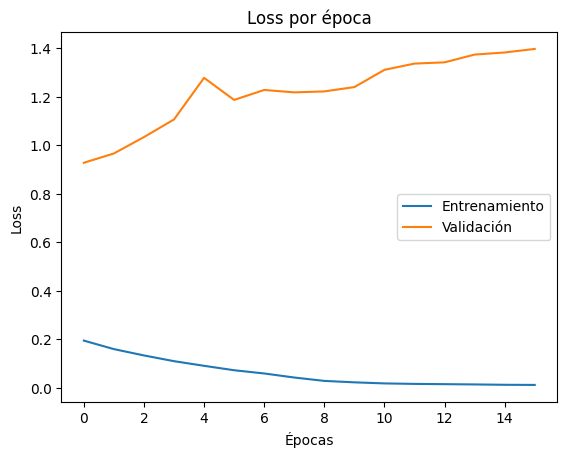

{'accuracy': [0.9498685598373413, 0.9572850465774536, 0.9629177451133728, 0.968644380569458, 0.9726811647415161, 0.9800976514816284, 0.9842283129692078, 0.9894855618476868, 0.9937101006507874, 0.994742751121521, 0.9956815838813782, 0.9962448477745056, 0.9963387250900269, 0.9965264797210693, 0.9966203570365906, 0.9970897436141968], 'loss': [0.1939687430858612, 0.15896275639533997, 0.13281922042369843, 0.10920581966638565, 0.09007783234119415, 0.07184620946645737, 0.05851311981678009, 0.041789885610342026, 0.02790856547653675, 0.02194339595735073, 0.01755448617041111, 0.015520033426582813, 0.014461059123277664, 0.013298338279128075, 0.011843548156321049, 0.011302315630018711], 'val_accuracy': [0.8183183073997498, 0.8288288116455078, 0.8318318128585815, 0.8352102041244507, 0.8213213086128235, 0.8337087035179138, 0.8269519805908203, 0.837087094783783, 0.8415915966033936, 0.8453453183174133, 0.8442192077636719, 0.842717707157135, 0.8434684872627258, 0.8404654860496521, 0.8430930972099304, 0

In [ ]:
plt.plot(history_dense.history['loss'], label='Entrenamiento')
plt.plot(history_dense.history['val_loss'], label='Validación')
plt.title('Loss por época')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()
plt.show()
print(history_dense.history)

In [ ]:
# Predicciones, estos ya son vectores con problabilidades
y_pred_probs = modelo_test.predict(input_test_dict)

84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [ ]:
import numpy as np

y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

accuracy = accuracy_score(y_true_classes, y_pred_classes)
precision = precision_score(y_true_classes, y_pred_classes, average='macro')
recall = recall_score(y_true_classes, y_pred_classes, average='macro')
f1 = f1_score(y_true_classes, y_pred_classes, average='macro')

print(accuracy)
print(precision)
print(recall)
print(f1)

0.8205705705705706
0.42869781646595057
0.43982012930950476
0.41951051978252113


C:\Users\Francisco\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Francisco\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## GRU
Similar a lo anterior, pero usando GRU esta vez

### Modelo

In [ ]:
from keras.models import Model
from keras.layers import Input, Embedding, Dense, GRU, LSTM, Concatenate, Bidirectional
from keras.layers import Masking
# Input de tokens de los codigos de procedimientos y diagnosticos
longitud_diag = padded_sequences_diag.shape[1]
longitud_diag01 = padded_sequences_diag01.shape[1]
longitud_proced = padded_sequences_proced.shape[1]
longitud_proced01 = padded_sequences_proced01.shape[1]
input_diag = Input(shape=(longitud_diag,), name='input_diag')
input_proced = Input(shape=(longitud_proced,), name='input_proced')
input_diag01 = Input(shape=(longitud_diag01,), name='input_diag01')
input_proced01 = Input(shape=(longitud_proced01,), name='input_proced01')
# Input normales
input_edad = Input(shape=(1,), name="input_edad")
input_sexo = Input(shape=(1,), name="input_sexo")

# Embeddings de los valores como tokens
dim_vocabulario_diag = len(vocabulario_final_diag) + 1
dim_vocabulario_proced = len(vocabulario_final_proced) + 1
embedding_diag = Embedding(input_dim=dim_vocabulario_diag, output_dim=64, mask_zero=True)(input_diag)
embedding_proced = Embedding(input_dim=dim_vocabulario_proced, output_dim=64, mask_zero=True)(input_proced)
embedding_diag01 = Embedding(input_dim=dim_vocabulario_diag, output_dim=64, mask_zero=True)(input_diag01)
embedding_proced01 = Embedding(input_dim=dim_vocabulario_proced, output_dim=64, mask_zero=True)(input_proced01)

gru_diag = Bidirectional(GRU(64))(embedding_diag)
gru_proced = Bidirectional(GRU(64))(embedding_proced)
gru_diag01 = Bidirectional(GRU(64))(embedding_diag01)
gru_proced01 = Bidirectional(GRU(64))(embedding_proced01)
# Junta todo en un solo vector magico


concatenado = Concatenate()([gru_diag, gru_proced, gru_diag01, gru_proced01, input_edad, input_sexo])
# Neuronas
#densa = Dense(32, activation='relu')(concatenado)
#for _ in range(10):
#    densa = Dense(128, activation='relu')(densa)

#Capa de salida
n_clases = df_mod_clean['GRD'].nunique()
salida = Dense(n_clases, activation='softmax')(concatenado)

modelo_gru = Model(inputs=[input_diag, input_proced, input_diag01, input_proced01, input_edad,input_sexo], outputs=salida)
modelo_gru.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
modelo_gru.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_diag          │ (None, 56)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_proced        │ (None, 54)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_diag01        │ (None, 3)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_proced01      │ (None, 2)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_16        │ (None, 56, 64)    │     89,088 │ input_diag[0][0]  │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal_4         │ (None, 56)        │          0 │ input_diag[0][0]  │
│ (NotEqual)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_17        │ (None, 54, 64)    │     13,632 │ input_proced[0][… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal_5         │ (None, 54)        │          0 │ input_proced[0][… │
│ (NotEqual)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_18        │ (None, 3, 64)     │     89,088 │ input_diag01[0][… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal_6         │ (None, 3)         │          0 │ input_diag01[0][… │
│ (NotEqual)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_19        │ (None, 2, 64)     │     13,632 │ input_proced01[0… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal_7         │ (None, 2)         │          0 │ input_proced01[0… │
│ (NotEqual)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_4     │ (None, 128)       │     49,920 │ embedding_16[0][… │
│ (Bidirectional)     │                   │            │ not_equal_4[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_5     │ (None, 128)       │     49,920 │ embedding_17[0][… │
│ (Bidirectional)     │                   │            │ not_equal_5[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_6     │ (None, 128)       │     49,920 │ embedding_18[0][… │
│ (Bidirectional)     │                   │            │ not_equal_6[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_7     │ (None, 128)       │     49,920 │ embedding_19[0][… │
│ (Bidirectional)     │                   │            │ not_equal_7[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_edad          │ (None, 1)         │          0 │ -               

 Total params: 510,695 (1.95 MB)

 Trainable params: 510,695 (1.95 MB)

 Non-trainable params: 0 (0.00 B)

### Entrenamiento

In [ ]:
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

history_gru = modelo_gru.fit(x=input_train_dict,
                y=y_train,
                validation_data=(input_test_dict,y_test),
                batch_size=64, epochs=64,
                callbacks=[early_stop])

Epoch 1/64
167/167 ━━━━━━━━━━━━━━━━━━━━ 17s 48ms/step - accuracy: 0.2190 - loss: 4.7653 - val_accuracy: 0.6843 - val_loss: 1.4614
Epoch 2/64
167/167 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - accuracy: 0.7516 - loss: 1.1451 - val_accuracy: 0.8127 - val_loss: 0.8401
Epoch 3/64
167/167 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - accuracy: 0.8528 - loss: 0.6381 - val_accuracy: 0.8536 - val_loss: 0.6521
Epoch 4/64
167/167 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - accuracy: 0.8909 - loss: 0.4337 - val_accuracy: 0.8712 - val_loss: 0.5670
Epoch 5/64
167/167 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - accuracy: 0.9184 - loss: 0.3202 - val_accuracy: 0.8806 - val_loss: 0.5293
Epoch 6/64
167/167 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - accuracy: 0.9393 - loss: 0.2457 - val_accuracy: 0.8874 - val_loss: 0.5092
Epoch 7/64
167/167 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - accuracy: 0.9529 - loss: 0.1904 - val_accuracy: 0.8930 - val_loss: 0.4973
Epoch 8/64
167/167 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - accuracy: 0.9651 - loss: 0.1476 - val_acc

### Loss / Eval Loss

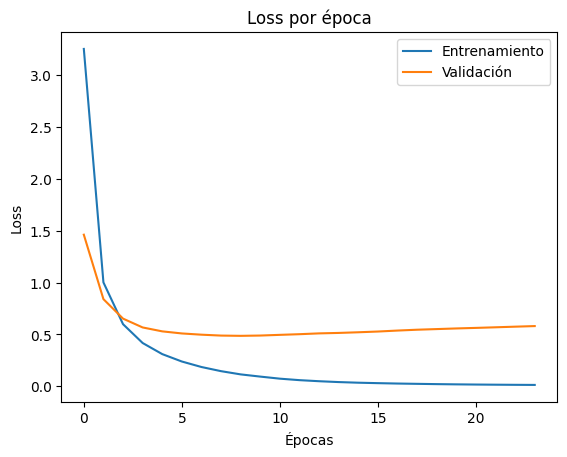

{'accuracy': [0.411565899848938, 0.7803229689598083, 0.8603079319000244, 0.8959819674491882, 0.9231130480766296, 0.9418888688087463, 0.9551258087158203, 0.9663912653923035, 0.9747465252876282, 0.9793465733528137, 0.983946681022644, 0.9870446920394897, 0.9901427030563354, 0.991926372051239, 0.9929590821266174, 0.9936162233352661, 0.9945549964904785, 0.995118260383606, 0.9956815838813782, 0.9962448477745056, 0.9965264797210693, 0.9967142343521118, 0.9970897436141968, 0.997183620929718], 'loss': [3.252876043319702, 1.001697301864624, 0.5985304713249207, 0.4170641005039215, 0.3099818229675293, 0.23855358362197876, 0.18559113144874573, 0.1455148458480835, 0.1144103854894638, 0.09306537359952927, 0.07312777638435364, 0.05884339660406113, 0.04852604493498802, 0.04026530683040619, 0.0342128723859787, 0.02990402840077877, 0.026138193905353546, 0.023259753361344337, 0.02049068920314312, 0.018286563456058502, 0.01646900549530983, 0.015033763833343983, 0.013810309581458569, 0.012839877046644688], 

In [ ]:
plt.plot(history_gru.history['loss'], label='Entrenamiento')
plt.plot(history_gru.history['val_loss'], label='Validación')
plt.title('Loss por época')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()
plt.show()
print(history_gru.history)

### Accuracy/Precicion/Recall/f1

In [ ]:
y_pred_probs_gru = modelo_gru.predict(input_test_dict)

84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step


In [ ]:
import numpy as np

y_pred_classes = np.argmax(y_pred_probs_gru, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

accuracy = accuracy_score(y_true_classes, y_pred_classes)
precision = precision_score(y_true_classes, y_pred_classes, average='macro')
recall = recall_score(y_true_classes, y_pred_classes, average='macro')
f1 = f1_score(y_true_classes, y_pred_classes, average='macro')

print(accuracy)
print(precision)
print(recall)
print(f1)

0.8888888888888888
0.6089247030002847
0.6211880416691671
0.6022425402292544


C:\Users\Francisco\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Francisco\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## LSTM
GRU mas caro

### Modelo

In [ ]:
from keras.models import Model
from keras.layers import Input, Embedding, Dense, GRU, LSTM, Concatenate, Bidirectional
from keras.layers import Masking
# Input de tokens de los codigos de procedimientos y diagnosticos
longitud_diag = padded_sequences_diag.shape[1]
longitud_diag01 = padded_sequences_diag01.shape[1]
longitud_proced = padded_sequences_proced.shape[1]
longitud_proced01 = padded_sequences_proced01.shape[1]
input_diag = Input(shape=(longitud_diag,), name='input_diag')
input_proced = Input(shape=(longitud_proced,), name='input_proced')
input_diag01 = Input(shape=(longitud_diag01,), name='input_diag01')
input_proced01 = Input(shape=(longitud_proced01,), name='input_proced01')
# Input normales
input_edad = Input(shape=(1,), name="input_edad")
input_sexo = Input(shape=(1,), name="input_sexo")

# Embeddings de los valores como tokens
dim_vocabulario_diag = len(vocabulario_final_diag) + 1
dim_vocabulario_proced = len(vocabulario_final_proced) + 1
embedding_diag = Embedding(input_dim=dim_vocabulario_diag, output_dim=64, mask_zero=True)(input_diag)
embedding_proced = Embedding(input_dim=dim_vocabulario_proced, output_dim=64, mask_zero=True)(input_proced)
embedding_diag01 = Embedding(input_dim=dim_vocabulario_diag, output_dim=64, mask_zero=True)(input_diag01)
embedding_proced01 = Embedding(input_dim=dim_vocabulario_proced, output_dim=64, mask_zero=True)(input_proced01)

lstm_diag = Bidirectional(LSTM(128))(embedding_diag)
lstm_proced = Bidirectional(LSTM(128))(embedding_proced)
lstm_diag01 = Bidirectional(LSTM(128))(embedding_diag01)
lstm_proced01 = Bidirectional(LSTM(128))(embedding_proced01)
# Junta todo en un solo vector magico


concatenado = Concatenate()([lstm_diag, lstm_proced, lstm_diag01, lstm_proced01, input_edad, input_sexo])
# Neuronas
#densa = Dense(32, activation='relu')(concatenado)
#for _ in range(10):
#    densa = Dense(128, activation='relu')(densa)

#Capa de salida
n_clases = df_mod_clean['GRD'].nunique()
salida = Dense(n_clases, activation='softmax')(concatenado)

modelo_lstm = Model(inputs=[input_diag, input_proced, input_diag01, input_proced01, input_edad,input_sexo], outputs=salida)
modelo_lstm.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
modelo_lstm.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_diag          │ (None, 56)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_proced        │ (None, 54)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_diag01        │ (None, 3)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_proced01      │ (None, 2)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_8         │ (None, 56, 64)    │     89,088 │ input_diag[0][0]  │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal_4         │ (None, 56)        │          0 │ input_diag[0][0]  │
│ (NotEqual)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_9         │ (None, 54, 64)    │     13,632 │ input_proced[0][… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal_5         │ (None, 54)        │          0 │ input_proced[0][… │
│ (NotEqual)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_10        │ (None, 3, 64)     │     89,088 │ input_diag01[0][… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal_6         │ (None, 3)         │          0 │ input_diag01[0][… │
│ (NotEqual)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_11        │ (None, 2, 64)     │     13,632 │ input_proced01[0… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal_7         │ (None, 2)         │          0 │ input_proced01[0… │
│ (NotEqual)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_4     │ (None, 256)       │    197,632 │ embedding_8[0][0… │
│ (Bidirectional)     │                   │            │ not_equal_4[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_5     │ (None, 256)       │    197,632 │ embedding_9[0][0… │
│ (Bidirectional)     │                   │            │ not_equal_5[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_6     │ (None, 256)       │    197,632 │ embedding_10[0][… │
│ (Bidirectional)     │                   │            │ not_equal_6[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_7     │ (None, 256)       │    197,632 │ embedding_11[0][… │
│ (Bidirectional)     │                   │            │ not_equal_7[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_edad          │ (None, 1)         │          0 │ -               

 Total params: 1,206,503 (4.60 MB)

 Trainable params: 1,206,503 (4.60 MB)

 Non-trainable params: 0 (0.00 B)

### Entrenamiento


In [ ]:
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history_lstm = modelo_lstm.fit(x=input_train_dict,
                y=y_train,
                validation_data=(input_test_dict,y_test),
                batch_size=64, epochs=64,
                callbacks=[early_stop])

Epoch 1/64
42/42 ━━━━━━━━━━━━━━━━━━━━ 21s 283ms/step - accuracy: 0.0823 - loss: 5.4189 - val_accuracy: 0.3660 - val_loss: 3.1905
Epoch 2/64
42/42 ━━━━━━━━━━━━━━━━━━━━ 11s 258ms/step - accuracy: 0.4631 - loss: 2.6001 - val_accuracy: 0.6438 - val_loss: 1.5736
Epoch 3/64
42/42 ━━━━━━━━━━━━━━━━━━━━ 11s 265ms/step - accuracy: 0.7045 - loss: 1.2798 - val_accuracy: 0.7804 - val_loss: 1.0235
Epoch 4/64
42/42 ━━━━━━━━━━━━━━━━━━━━ 11s 259ms/step - accuracy: 0.8108 - loss: 0.8147 - val_accuracy: 0.8266 - val_loss: 0.8108
Epoch 5/64
42/42 ━━━━━━━━━━━━━━━━━━━━ 11s 261ms/step - accuracy: 0.8565 - loss: 0.6059 - val_accuracy: 0.8465 - val_loss: 0.7068
Epoch 6/64
42/42 ━━━━━━━━━━━━━━━━━━━━ 11s 264ms/step - accuracy: 0.8783 - loss: 0.4873 - val_accuracy: 0.8562 - val_loss: 0.6493
Epoch 7/64
42/42 ━━━━━━━━━━━━━━━━━━━━ 12s 275ms/step - accuracy: 0.8994 - loss: 0.4030 - val_accuracy: 0.8652 - val_loss: 0.6102
Epoch 8/64
42/42 ━━━━━━━━━━━━━━━━━━━━ 12s 278ms/step - accuracy: 0.9138 - loss: 0.3388 - val_accu

### Loss/ Val Loss

In [ ]:
plt.plot(history_lstm.history['loss'], label='Entrenamiento')
plt.plot(history_lstm.history['val_loss'], label='Validación')
plt.title('Loss por época')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()
plt.show()
print(history_lstm.history)

### Accuracy/Precision/Recall/f1

In [ ]:
y_pred_probs_lstm = modelo_lstm.predict(input_test_dict)

84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step


In [ ]:

y_pred_classes = np.argmax(y_pred_probs_lstm, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

accuracy = accuracy_score(y_true_classes, y_pred_classes)
precision = precision_score(y_true_classes, y_pred_classes, average='macro')
recall = recall_score(y_true_classes, y_pred_classes, average='macro')
f1 = f1_score(y_true_classes, y_pred_classes, average='macro')

print(accuracy)
print(precision)
print(recall)
print(f1)

0.8930180180180181
0.622373830711723
0.6294704954607484
0.609787478913463


C:\Users\Francisco\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Francisco\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## GRU + Denso
Basicamente iniciando con gru para despues tener unas capas estandar

### Modelo

In [ ]:
from keras.models import Model
from keras.layers import Input, Embedding, Dense, GRU, LSTM, Concatenate, Bidirectional
from keras.layers import Masking
# Input de tokens de los codigos de procedimientos y diagnosticos
longitud_diag = padded_sequences_diag.shape[1]
longitud_diag01 = padded_sequences_diag01.shape[1]
longitud_proced = padded_sequences_proced.shape[1]
longitud_proced01 = padded_sequences_proced01.shape[1]
input_diag = Input(shape=(longitud_diag,), name='input_diag')
input_proced = Input(shape=(longitud_proced,), name='input_proced')
input_diag01 = Input(shape=(longitud_diag01,), name='input_diag01')
input_proced01 = Input(shape=(longitud_proced01,), name='input_proced01')
# Input normales
input_edad = Input(shape=(1,), name="input_edad")
input_sexo = Input(shape=(1,), name="input_sexo")

# Embeddings de los valores como tokens
dim_vocabulario_diag = len(vocabulario_final_diag) + 1
dim_vocabulario_proced = len(vocabulario_final_proced) + 1
embedding_diag = Embedding(input_dim=dim_vocabulario_diag, output_dim=64, mask_zero=True)(input_diag)
embedding_proced = Embedding(input_dim=dim_vocabulario_proced, output_dim=64, mask_zero=True)(input_proced)
embedding_diag01 = Embedding(input_dim=dim_vocabulario_diag, output_dim=64, mask_zero=True)(input_diag01)
embedding_proced01 = Embedding(input_dim=dim_vocabulario_proced, output_dim=64, mask_zero=True)(input_proced01)

gru_diag = Bidirectional(GRU(128))(embedding_diag)
gru_proced = Bidirectional(GRU(128))(embedding_proced)
gru_diag01 = Bidirectional(GRU(128))(embedding_diag01)
gru_proced01 = Bidirectional(GRU(128))(embedding_proced01)
# Junta todo en un solo vector magico


concatenado = Concatenate()([gru_diag, gru_proced, gru_diag01, gru_proced01, input_edad, input_sexo])
# Neuronas
densa = Dense(64, activation='relu')(concatenado)
for _ in range(3):
    densa = Dense(128, activation='relu')(densa)

#Capa de salida
n_clases = df_mod_clean['GRD'].nunique()
salida = Dense(n_clases, activation='softmax')(densa)

modelo_gru_dense = Model(inputs=[input_diag, input_proced, input_diag01, input_proced01, input_edad,input_sexo], outputs=salida)
modelo_gru_dense.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
modelo_gru_dense.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_diag          │ (None, 56)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_proced        │ (None, 54)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_diag01        │ (None, 3)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_proced01      │ (None, 2)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_12        │ (None, 56, 64)    │     89,088 │ input_diag[0][0]  │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal_8         │ (None, 56)        │          0 │ input_diag[0][0]  │
│ (NotEqual)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_13        │ (None, 54, 64)    │     13,632 │ input_proced[0][… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal_9         │ (None, 54)        │          0 │ input_proced[0][… │
│ (NotEqual)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_14        │ (None, 3, 64)     │     89,088 │ input_diag01[0][… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal_10        │ (None, 3)         │          0 │ input_diag01[0][… │
│ (NotEqual)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_15        │ (None, 2, 64)     │     13,632 │ input_proced01[0… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal_11        │ (None, 2)         │          0 │ input_proced01[0… │
│ (NotEqual)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_8     │ (None, 256)       │    148,992 │ embedding_12[0][… │
│ (Bidirectional)     │                   │            │ not_equal_8[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_9     │ (None, 256)       │    148,992 │ embedding_13[0][… │
│ (Bidirectional)     │                   │            │ not_equal_9[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_10    │ (None, 256)       │    148,992 │ embedding_14[0][… │
│ (Bidirectional)     │                   │            │ not_equal_10[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_11    │ (None, 256)       │    148,992 │ embedding_15[0][… │
│ (Bidirectional)     │                   │            │ not_equal_11[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_edad          │ (None, 1)         │          0 │ -               

 Total params: 934,925 (3.57 MB)

 Trainable params: 934,925 (3.57 MB)

 Non-trainable params: 0 (0.00 B)

### Entrenamiento

In [ ]:
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

modelo_gru_dense.fit(x=input_train_dict,
                y=y_train,
                validation_data=(input_test_dict,y_test),
                batch_size=256, epochs=64,
                callbacks=[early_stop])

Epoch 1/64
42/42 ━━━━━━━━━━━━━━━━━━━━ 21s 273ms/step - accuracy: 0.1184 - loss: 4.7741 - val_accuracy: 0.2523 - val_loss: 3.2660
Epoch 2/64
42/42 ━━━━━━━━━━━━━━━━━━━━ 9s 216ms/step - accuracy: 0.3394 - loss: 2.9256 - val_accuracy: 0.5199 - val_loss: 2.2248
Epoch 3/64
42/42 ━━━━━━━━━━━━━━━━━━━━ 9s 226ms/step - accuracy: 0.5711 - loss: 1.9775 - val_accuracy: 0.6460 - val_loss: 1.5990
Epoch 4/64
42/42 ━━━━━━━━━━━━━━━━━━━━ 10s 235ms/step - accuracy: 0.6894 - loss: 1.3813 - val_accuracy: 0.7102 - val_loss: 1.2506
Epoch 5/64
42/42 ━━━━━━━━━━━━━━━━━━━━ 10s 230ms/step - accuracy: 0.7595 - loss: 1.0514 - val_accuracy: 0.7624 - val_loss: 1.0770
Epoch 6/64
42/42 ━━━━━━━━━━━━━━━━━━━━ 10s 237ms/step - accuracy: 0.7986 - loss: 0.8609 - val_accuracy: 0.7864 - val_loss: 0.9899
Epoch 7/64
 8/42 ━━━━━━━━━━━━━━━━━━━━ 7s 229ms/step - accuracy: 0.8372 - loss: 0.7088

KeyboardInterrupt: 

### Accuracy Precision Recall F1

In [ ]:
y_pred_probs_gru_dense= modelo_gru_dense.predict(input_test_dict)

In [ ]:

y_pred_classes = np.argmax(y_pred_probs_gru_dense, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

accuracy = accuracy_score(y_true_classes, y_pred_classes)
precision = precision_score(y_true_classes, y_pred_classes, average='macro')
recall = recall_score(y_true_classes, y_pred_classes, average='macro')
f1 = f1_score(y_true_classes, y_pred_classes, average='macro')

print(accuracy)
print(precision)
print(recall)
print(f1)

## Denso secuencial
Aqui vamos a predecir el codigo por partes, comenzando con los dos primeros digitos, luego con el tercero, y por ultimo los ultimos dos
Seran tres redes seguidas, que usaran la salida de la anterior como entrada nueva

### Preparacion GRD y las 3 salidas

In [ ]:
df_mod_clean_token['GRD_CDM'] = df_mod_clean_token['GRD'].astype(str).str[:2]
df_mod_clean_token['GRD_Tipo'] = df_mod_clean_token['GRD'].astype(str).str[2]
df_mod_clean_token['GRD_GRD'] = df_mod_clean_token['GRD'].astype(str).str[3:]

In [ ]:
clases_cdm = [f"{i:02}" for i in range(1, 24)]
clases_tipo = [f"{i}" for i in range(1, 10)]
clases_grd = [f"{i:02}" for i in range(1, 100)]
print(clases_cdm)
print(clases_tipo)
print(clases_grd)

['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23']
['1', '2', '3', '4', '5', '6', '7', '8', '9']
['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99']


In [ ]:
y_cdm = df_mod_clean_token['GRD_CDM']
y_tipo = df_mod_clean_token['GRD_Tipo']
y_grd = df_mod_clean_token['GRD_GRD']
y_bins_cdm = label_binarize(y_cdm, classes = clases_cdm)
y_bins_tipo = label_binarize(y_tipo, classes = clases_tipo)
y_bins_grd = label_binarize(y_grd, classes = clases_grd)
print(y_bins_tipo)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


### Preparacion dataset

In [ ]:
X.rename(columns={
    'DiagSecundariosToken': 'diag',
    'ProcedSecundariosToken' : 'proced',
    'Diag01Token': 'diag01',
    'Proced01Token': 'proced01',
    'Edad en años': 'edad',
    'Sexo_bin': 'sexo',
    }, inplace=True)

X_train, X_test, y_train_cdm, y_test_cdm, y_train_tipo, y_test_tipo, y_train_grd, y_test_grd = train_test_split(X,
                                           y_bins_cdm, y_bins_tipo, y_bins_grd,
                                           test_size=0.2, random_state=42)

# Diccionarios para el fit del modelo
input_train_dict = {}
for col in X_train:
    nombre = 'input_'+col
    input_train = np.array(X_train[col].tolist(), dtype=np.int32)
    input_train_dict[nombre]=input_train

input_test_dict = {}
for col in X_test:
    nombre = 'input_'+col
    input_test= np.array(X_test[col].tolist(), dtype=np.int32)
    input_test_dict[nombre]=input_test

C:\Users\Francisco\AppData\Local\Temp\ipykernel_32784\2656152498.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.rename(columns={


### Modelo y entrenamiento

In [ ]:
from keras.models import Model
from keras.layers import Input, Embedding, GRU, Dense, Concatenate, Bidirectional

# Input de tokens de los codigos de procedimientos y diagnosticos
longitud_diag = padded_sequences_diag.shape[1]
longitud_diag01 = padded_sequences_diag01.shape[1]
longitud_proced = padded_sequences_proced.shape[1]
longitud_proced01 = padded_sequences_proced01.shape[1]
input_diag = Input(shape=(longitud_diag,), name='input_diag')
input_proced = Input(shape=(longitud_proced,), name='input_proced')
input_diag01 = Input(shape=(longitud_diag01,), name='input_diag01')
input_proced01 = Input(shape=(longitud_proced01,), name='input_proced01')
# Input normales
input_edad = Input(shape=(1,), name="input_edad")
input_sexo = Input(shape=(1,), name="input_sexo")

# Embeddings de los valores como tokens
dim_vocabulario_diag = len(vocabulario_final_diag) + 1
dim_vocabulario_proced = len(vocabulario_final_proced) + 1
embedding_diag = Embedding(input_dim=dim_vocabulario_diag, output_dim=64)(input_diag)
embedding_proced = Embedding(input_dim=dim_vocabulario_proced, output_dim=64)(input_proced)
embedding_diag01 = Embedding(input_dim=dim_vocabulario_diag, output_dim=64)(input_diag01)
embedding_proced01 = Embedding(input_dim=dim_vocabulario_proced, output_dim=64)(input_proced01)
# GRU
gru_diag = Bidirectional(GRU(32))(embedding_diag)
gru_proced = Bidirectional(GRU(32))(embedding_proced)
gru_diag01 = Bidirectional(GRU(32))(embedding_diag01)
gru_proced01 = Bidirectional(GRU(32))(embedding_proced01)

# El concatenate inicial
base = Concatenate()([gru_diag, gru_proced, gru_diag01, gru_proced01, input_edad, input_sexo])
base = Dense(64, activation='relu')(base)

# Salida 1: CDM
out_cdm = Dense(len(clases_cdm), activation='softmax', name='output_cdm')(base)

# Concatenar salida 1 para la predicción de el tipo
concat_2 = Concatenate()([base, out_cdm])
base2 = Dense(64, activation='relu')(concat_2)
out_tipo = Dense(len(clases_tipo), activation='softmax', name='output_tipo')(base2)

# Concatenar salida 2 también para predecir la tercera parte
concat_3 = Concatenate()([concat_2, out_tipo])
base3 = Dense(64, activation='relu')(concat_3)
out_grd = Dense(len(clases_grd), activation='softmax', name='output_grd')(base3)


modelo_sec1 = Model(
    inputs=[input_diag, input_proced, input_diag01, input_proced01, input_edad,input_sexo],
    outputs=[out_cdm,out_tipo,out_grd])
modelo_sec1.compile(optimizer="adam",
                    loss={
                        'output_cdm': 'categorical_crossentropy',
                        'output_tipo': 'categorical_crossentropy',
                        'output_grd': 'categorical_crossentropy'
                        },
                     metrics={
                        'output_cdm': 'accuracy',
                        'output_tipo': 'accuracy',
                        'output_grd': 'accuracy'
                    })
modelo_sec1.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_diag          │ (None, 56)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_proced        │ (None, 54)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_diag01        │ (None, 3)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_proced01      │ (None, 2)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_24        │ (None, 56, 64)    │     89,088 │ input_diag[0][0]  │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_25        │ (None, 54, 64)    │     13,632 │ input_proced[0][… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_26        │ (None, 3, 64)     │     89,088 │ input_diag01[0][… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_27        │ (None, 2, 64)     │     13,632 │ input_proced01[0… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_12    │ (None, 64)        │     18,816 │ embedding_24[0][… │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_13    │ (None, 64)        │     18,816 │ embedding_25[0][… │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_14    │ (None, 64)        │     18,816 │ embedding_26[0][… │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_15    │ (None, 64)        │     18,816 │ embedding_27[0][… │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_edad          │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_sexo          │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_6       │ (None, 258)       │          0 │ bidirectional_12… │
│ (Concatenate)       │                   │            │ bidirectional_13… │
│                     │                   │            │ bidirectional_14… │
│                     │                   │            │ bidirectional_15… │
│                     │                   │            │ input_edad[0][0], │
│                     │                   │            │ input_sexo[0][0]  │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 317,635 (1.21 MB)

 Trainable params: 317,635 (1.21 MB)

 Non-trainable params: 0 (0.00 B)

### Entrenamiento

In [ ]:
from keras.callbacks import EarlyStopping
#early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True,)
history_sec1 = modelo_sec1.fit(x=input_train_dict,
                y={
                    'output_cdm': y_train_cdm,
                    'output_tipo': y_train_tipo,
                    'output_grd': y_train_grd
                },
                validation_data=(input_test_dict,{
                    'output_cdm': y_test_cdm,
                    'output_tipo': y_test_tipo,
                    'output_grd': y_test_grd
                }),
                batch_size=64, epochs=12)
#, callbacks=[early_stop])

Epoch 1/12
167/167 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - loss: 6.4154 - output_cdm_accuracy: 0.4027 - output_cdm_loss: 2.3191 - output_grd_accuracy: 0.1996 - output_grd_loss: 3.1711 - output_tipo_accuracy: 0.6715 - output_tipo_loss: 0.9251 - val_loss: 2.2889 - val_output_cdm_accuracy: 0.8498 - val_output_cdm_loss: 0.6116 - val_output_grd_accuracy: 0.5537 - val_output_grd_loss: 1.5583 - val_output_tipo_accuracy: 0.9587 - val_output_tipo_loss: 0.1223
Epoch 2/12
167/167 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 2.0238 - output_cdm_accuracy: 0.8722 - output_cdm_loss: 0.5376 - output_grd_accuracy: 0.5991 - output_grd_loss: 1.3755 - output_tipo_accuracy: 0.9638 - output_tipo_loss: 0.1108 - val_loss: 1.6077 - val_output_cdm_accuracy: 0.9043 - val_output_cdm_loss: 0.3863 - val_output_grd_accuracy: 0.6907 - val_output_grd_loss: 1.1181 - val_output_tipo_accuracy: 0.9703 - val_output_tipo_loss: 0.1056
Epoch 3/12
167/167 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 1.4380 - output_cdm_accuracy: 0.9153

### Loss/ Val loss por salida

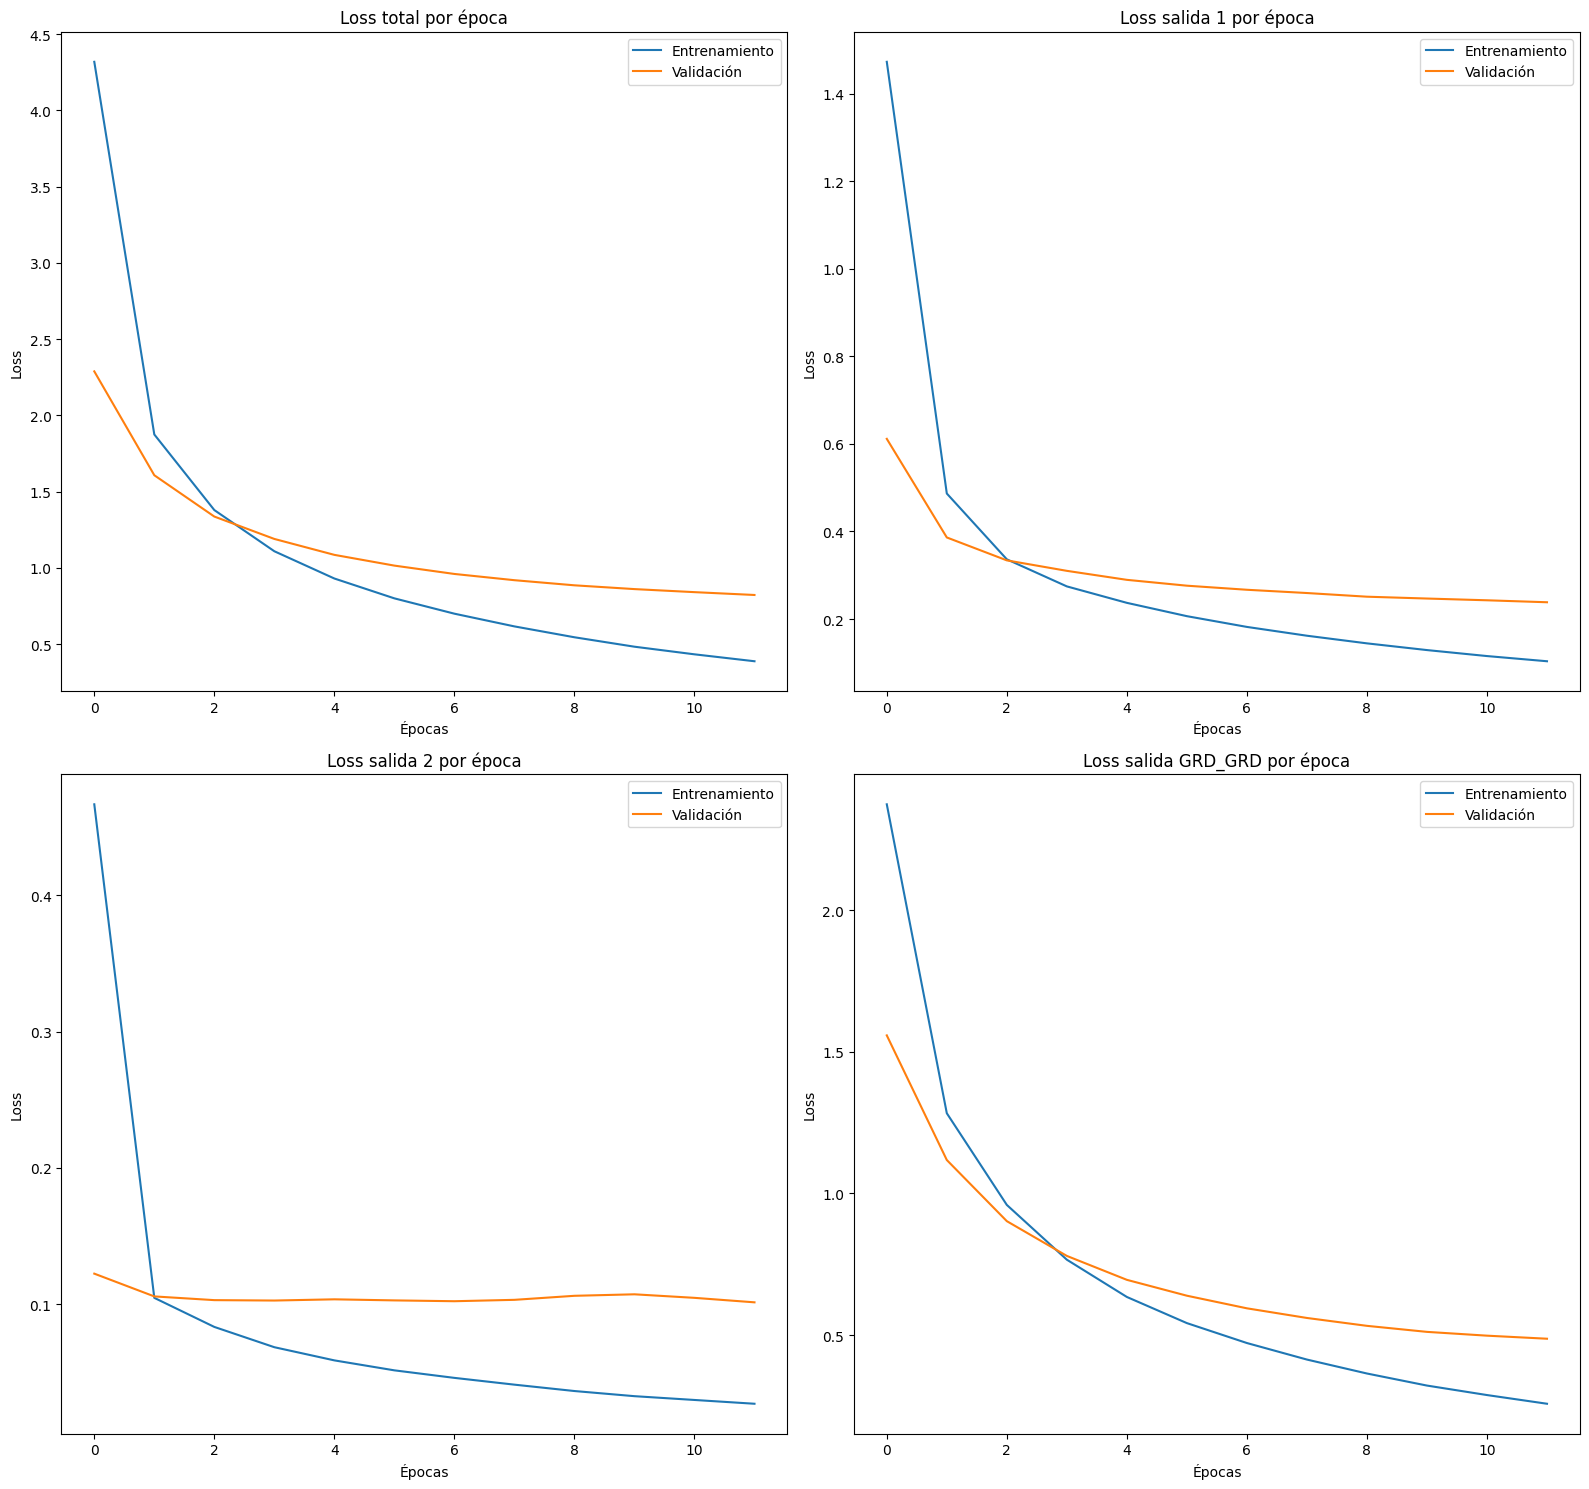

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(16, 15))

# Loss total (combinada de todas las salidas)
axes[0, 0].plot(history_sec1.history['loss'], label='Entrenamiento')
axes[0, 0].plot(history_sec1.history['val_loss'], label='Validación')
axes[0, 0].set_title('Loss total por época')
axes[0, 0].set_xlabel('Épocas')
axes[0, 0].set_ylabel('Loss')
axes[0, 0].legend()

# Salida CDM
axes[0, 1].plot(history_sec1.history['output_cdm_loss'], label='Entrenamiento')
axes[0, 1].plot(history_sec1.history['val_output_cdm_loss'], label='Validación')
axes[0, 1].set_title('Loss salida 1 por época')
axes[0, 1].set_xlabel('Épocas')
axes[0, 1].set_ylabel('Loss')
axes[0, 1].legend()

# Salida Tipo
axes[1, 0].plot(history_sec1.history['output_tipo_loss'], label='Entrenamiento')
axes[1, 0].plot(history_sec1.history['val_output_tipo_loss'], label='Validación')
axes[1, 0].set_title('Loss salida 2 por época')
axes[1, 0].set_xlabel('Épocas')
axes[1, 0].set_ylabel('Loss')
axes[1, 0].legend()

# Salida GRD_GRD
axes[1, 1].plot(history_sec1.history['output_grd_loss'], label='Entrenamiento')
axes[1, 1].plot(history_sec1.history['val_output_grd_loss'], label='Validación')
axes[1, 1].set_title('Loss salida GRD_GRD por época')
axes[1, 1].set_xlabel('Épocas')
axes[1, 1].set_ylabel('Loss')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

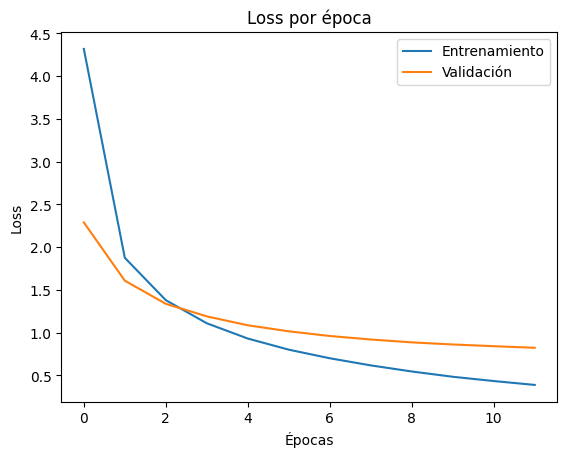

{'loss': [4.318835258483887, 1.8750510215759277, 1.3793410062789917, 1.1092716455459595, 0.9305086731910706, 0.8003510236740112, 0.6998726725578308, 0.616485595703125, 0.5452002286911011, 0.48335859179496765, 0.43337592482566833, 0.38795578479766846], 'output_cdm_accuracy': [0.6054261922836304, 0.8819940090179443, 0.9165415167808533, 0.9317498803138733, 0.9414194226264954, 0.9502440690994263, 0.9549380540847778, 0.9592564702033997, 0.9635748863220215, 0.9671423435211182, 0.9705219864845276, 0.9732444882392883], 'output_cdm_loss': [1.4728748798370361, 0.486719012260437, 0.3363761305809021, 0.27453628182411194, 0.2369665950536728, 0.20653174817562103, 0.18197457492351532, 0.1618705689907074, 0.14440879225730896, 0.1290743201971054, 0.11541368067264557, 0.10354670137166977], 'output_grd_accuracy': [0.33092376589775085, 0.6205407381057739, 0.718644380569458, 0.7822943925857544, 0.8212542533874512, 0.8498873710632324, 0.870165228843689, 0.8861246705055237, 0.901520848274231, 0.9127863049507

In [ ]:
import matplotlib.pyplot as plt



plt.plot(history_sec1.history['loss'], label='Entrenamiento')
plt.plot(history_sec1.history['val_loss'], label='Validación')
plt.title('Loss por época')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()
plt.show()
print(history_sec1.history)

### Accuracy / Precision / Recall / F1

In [ ]:
y_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
y_pred_probs_sec1= modelo_sec1.predict(input_test_dict)


def evaluacion_base(y_test, y_pred_probs, nombre=''):
    y_pred_classes = np.argmax(y_pred_probs, axis=1)
    y_true_classes = np.argmax(y_test, axis=1)

    accuracy = accuracy_score(y_true_classes, y_pred_classes)
    precision = precision_score(y_true_classes, y_pred_classes, average='macro', zero_division=0)
    recall = recall_score(y_true_classes, y_pred_classes, average='macro', zero_division=0)
    f1 = f1_score(y_true_classes, y_pred_classes, average='macro', zero_division=0)
    print(f"\nEvaluación {nombre}:")
    print(f"Accuracy:  {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1 Score:  {f1:.4f}")


evaluacion_base(y_test_cdm,y_pred_probs_sec1[0], 'CDM')
evaluacion_base(y_test_tipo,y_pred_probs_sec1[1], 'Tipo')
evaluacion_base(y_test_grd,y_pred_probs_sec1[2], 'GRD')

84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step

Evaluación CDM:
Accuracy:  0.9489
Precision: 0.8345
Recall:    0.7755
F1 Score:  0.7927

Evaluación Tipo:
Accuracy:  0.9794
Precision: 0.9644
Recall:    0.9757
F1 Score:  0.9699

Evaluación GRD:
Accuracy:  0.8878
Precision: 0.7179
Recall:    0.7186
F1 Score:  0.7153


### Curvas ROC

In [ ]:
df_mod_clean_token['GRD_CDM'].value_counts()

GRD_CDM
14    2925
06    1548
04    1530
13    1489
07     905
05     739
15     734
11     704
09     593
01     492
19     314
21     282
08     250
10     192
16     124
12     115
18     110
22     110
03      87
20      32
02      29
17      12
Name: count, dtype: int64

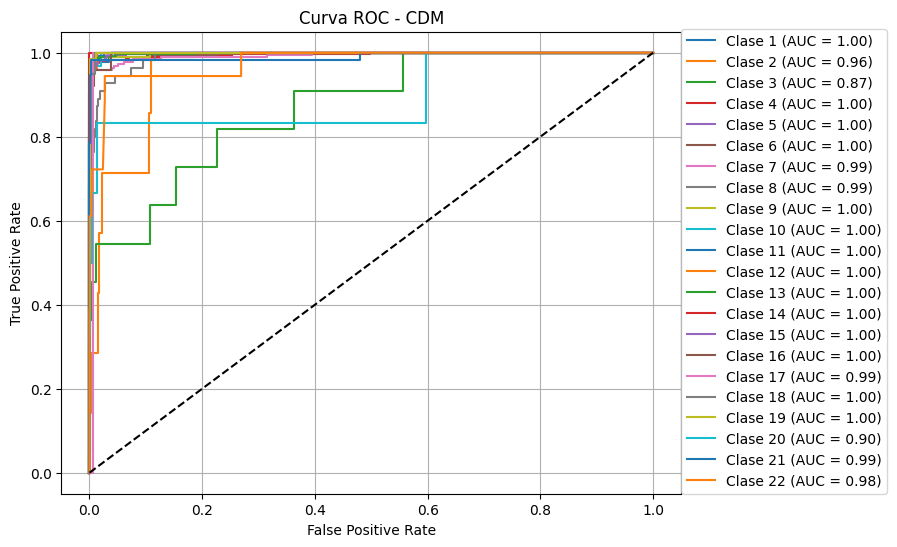

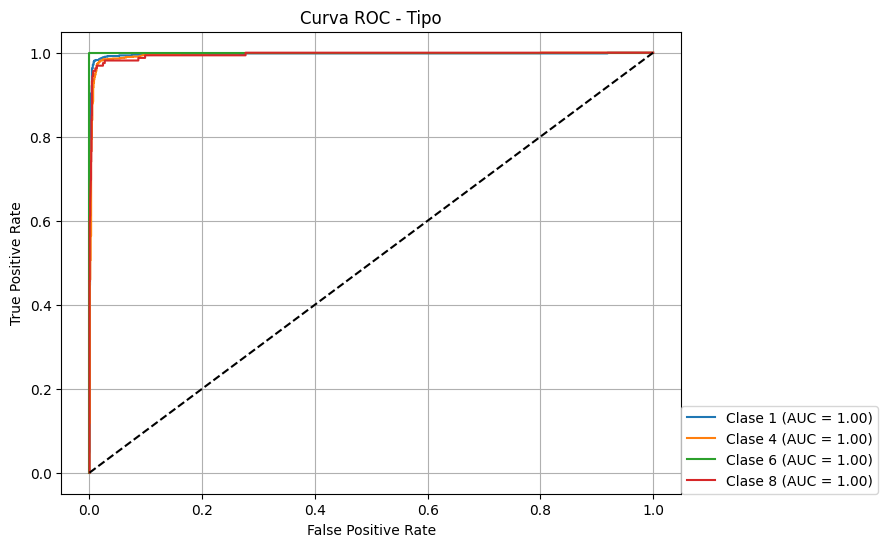

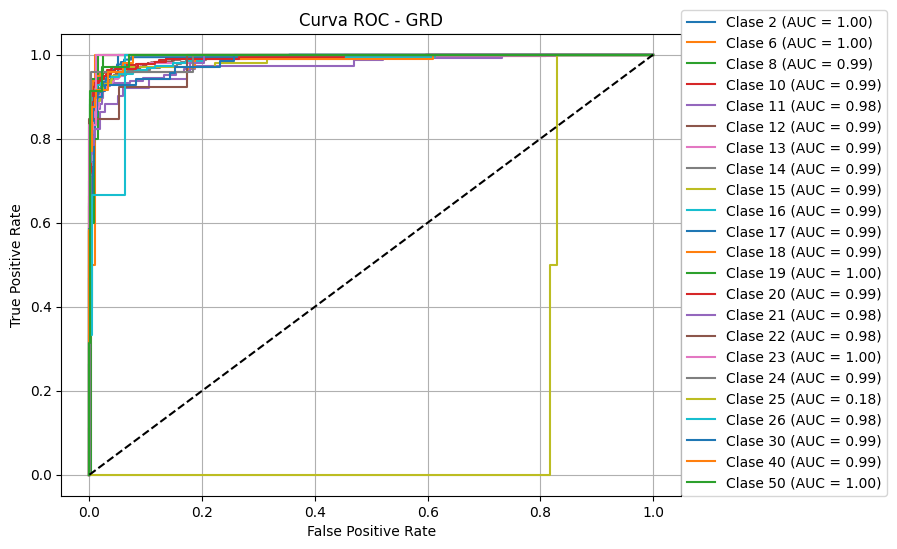

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
import numpy as np

# Suponiendo que ya tienes las predicciones:
# y_pred1, y_pred2, y_pred3 = modelo_cascada.predict(input_test_dict)
# Y también las verdaderas en one-hot:
# y_test1, y_test2, y_test3

# Nombres opcionales
output_labels = ['CDM', 'Tipo', 'GRD']
y_preds = []
y_trues = [y_test_cdm, y_test_tipo, y_test_grd]
for item in y_pred_probs_sec1:
    y_preds.append(item)


for i, (y_true, y_pred) in enumerate(zip(y_trues, y_preds)):
    n_classes = y_true.shape[1]

    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # Calcular FPR, TPR para cada clase
    for j in range(n_classes):
        if len(np.unique(y_true[:, j])) < 2:
            continue  # no hay positivos y negativos
        fpr[j], tpr[j], _ = roc_curve(y_true[:, j], y_pred[:, j])
        roc_auc[j] = auc(fpr[j], tpr[j])

    # Plot ROC para cada clase en una figura
    plt.figure(figsize=(8, 6))
    for j in range(n_classes):
        if len(np.unique(y_true[:, j])) < 2:
            continue  # no hay positivos y negativos
        plt.plot(fpr[j], tpr[j], label=f'Clase {j+1} (AUC = {roc_auc[j]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.title(f'Curva ROC - {output_labels[i]}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc = (1,0))
    plt.grid(True)
    plt.show()

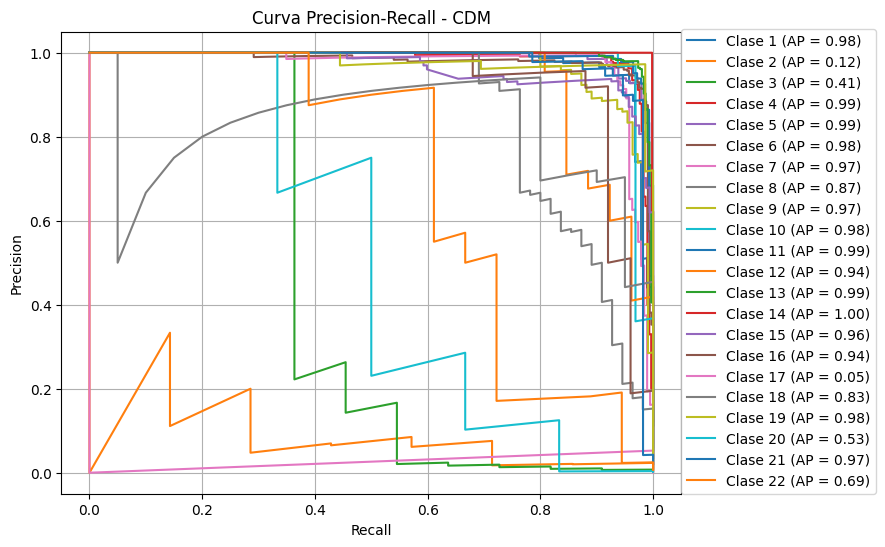

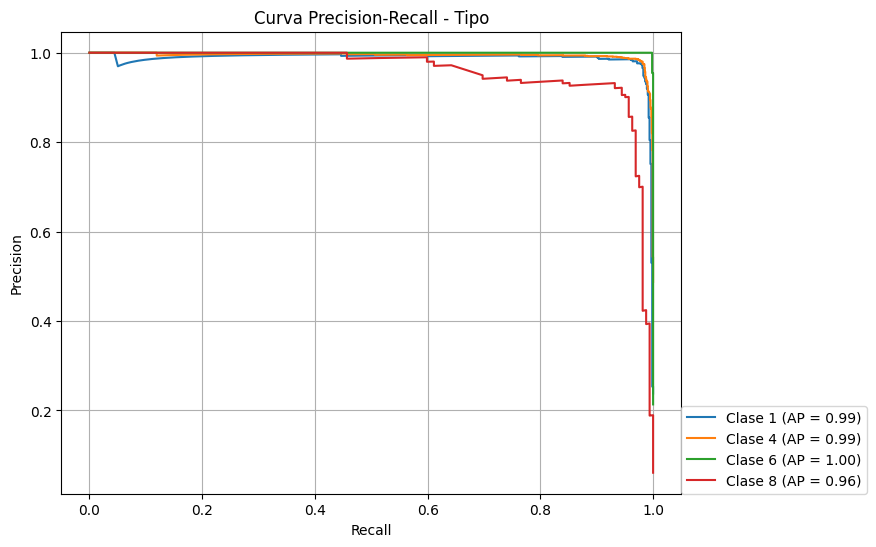

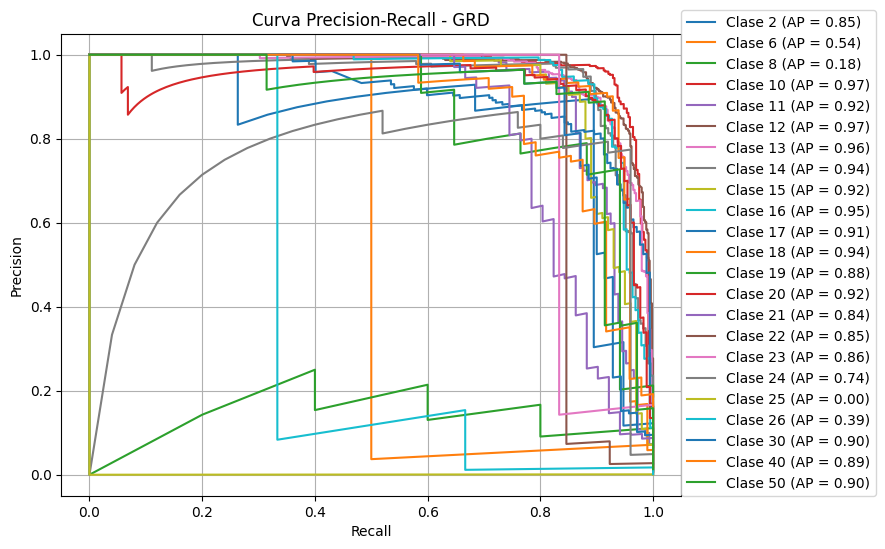

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
import numpy as np

# Etiquetas de salida
output_labels = ['CDM', 'Tipo', 'GRD']
y_preds = [y_pred_probs_sec1[0], y_pred_probs_sec1[1], y_pred_probs_sec1[2]]
y_trues = [y_test_cdm, y_test_tipo, y_test_grd]

for i, (y_true, y_pred) in enumerate(zip(y_trues, y_preds)):
    n_classes = y_true.shape[1]

    precision, recall, pr_auc = dict(), dict(), dict()

    for j in range(n_classes):
        if len(np.unique(y_true[:, j])) < 2:
            continue  # Clase sin positivos y negativos
        precision[j], recall[j], _ = precision_recall_curve(y_true[:, j], y_pred[:, j])
        pr_auc[j] = average_precision_score(y_true[:, j], y_pred[:, j])

    plt.figure(figsize=(8, 6))
    for j in pr_auc.keys():
        plt.plot(recall[j], precision[j], label=f'Clase {j+1} (AP = {pr_auc[j]:.2f})')

    plt.title(f'Curva Precision-Recall - {output_labels[i]}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend(loc=(1,0))
    plt.grid(True)
    plt.show()

## Modelos no Neuronales


### Preparacion dataset

In [ ]:
X_non = np.hstack([
    np.array(df_mod_clean_token['Diag01Token'].tolist()),
    np.array(df_mod_clean_token['DiagSecundariosToken'].tolist()),
    np.array(df_mod_clean_token['Proced01Token'].tolist()),
    np.array(df_mod_clean_token['ProcedSecundariosToken'].tolist()),
    np.array(df_mod_clean_token['Edad en años']).reshape(-1, 1),
    np.array(df_mod_clean_token['Sexo_bin']).reshape(-1, 1),
])

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [ ]:
# Dividir en entrenamiento y prueba
X_non_train, X_non_test, y_train, y_test = train_test_split(X_non, y, test_size=0.2, random_state=42)

In [ ]:
# Normalizar
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_non_train)
X_test_scaled = scaler.transform(X_non_test)


### Random Forest

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 500,1000]
    'max_features': ['sqrt', 'log2']
}

grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid.fit(X_train_scaled, y_train)
print(grid.best_params_)

C:\Users\Francisco\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


KeyboardInterrupt: 

In [ ]:
df_mod_clean_token.head()

,Diag01,Diag02,Diag03,Diag04,Diag05,Diag06,Diag07,Diag08,Diag09,Diag10,...,GRD,Sexo_bin,num_diag,num_proced,DiagSecundarios,ProcedSecundarios,Diag01Token,Proced01Token,DiagSecundariosToken,ProcedSecundariosToken
12,"[F, 20, .6]",F14.2,F10.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,19410,0,3,19,"[F, 14, .2, F, 10, .2]","[87, .44, 88, .76, 99, .26, 99, .29, 90, .59, ...","[469, 176, 3]","[46, 35]","[469, 193, 6, 469, 158, 6, 0, 0, 0, 0, 0, 0, 0...","[15, 55, 7, 58, 5, 89, 5, 30, 13, 49, 19, 77, ..."
15,"[I, 20, .0]",I25.1,I50.0,I70.20,I65.2,I70.80,I77.8,I25.2,I10,U07.1,...,05420,1,16,24,"[I, 25, .1, I, 50, .0, I, 70, .20, I, 65, .2, ...","[88, .72, 89, .52, 88, .71, 88, .77, 87, .44, ...","[470, 176, 4]","[15, 26]","[470, 151, 5, 470, 206, 4, 470, 185, 176, 470,...","[7, 45, 19, 44, 7, 39, 7, 2, 15, 55, 13, 20, 1..."
20,"[P, 22, .1]",P28.4,Q21.1,P61.2,P03.4,P02.1,P59.0,P07.3,Z59.7,Z65.3,...,15812,0,10,24,"[P, 28, .4, Q, 21, .1, P, 61, .2, P, 03, .4, P...","[88, .71, 88, .72, 89, .50, 88, .79, 99, .83, ...","[478, 168, 5]","[15, 55]","[478, 199, 457, 462, 155, 5, 478, 229, 6, 478,...","[7, 39, 7, 45, 19, 91, 7, 4, 5, 37, 64, 17, 64..."
26,"[D, 64, .8]",D70,D69.6,N30.8,R31,K72.1,K62.8,C53.9,E87.5,E11.9,...,16413,0,15,28,"[D, 70, D, 69, .6, N, 30, .8, R, 31, K, 72, .1...","[57, .32, 45, .23, 45, .13, 88, .01, 87, .41, ...","[465, 238, 456]","[5, 76]","[465, 185, 465, 242, 3, 466, 172, 456, 476, 16...","[62, 43, 36, 47, 36, 73, 7, 29, 15, 26, 15, 18..."
32,"[K, 86, .8]",U07.1,Z88.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,07412,0,3,24,"[U, 07, .1, Z, 88, .8]","[88, .38, 96, .59, 99, .84, 99, .18, 99, .19, ...","[467, 182, 456]","[7, 29]","[480, 244, 5, 461, 228, 456, 0, 0, 0, 0, 0, 0,...","[7, 9, 32, 49, 5, 12, 5, 96, 5, 35, 5, 16, 5, ..."


In [ ]:
# Entrenar modelo Random Forest
rf = RandomForestClassifier(n_estimators=1000, random_state=42, class_weight='balanced')
rf.fit(X_train_scaled, y_train)

# Predicciones
y_pred_rf = rf.predict(X_test_scaled)

# Reporte de mÃ©tricas
print("Random Forest Report:")
print(classification_report(y_test, y_pred_rf, zero_division=0))


Random Forest Report:
              precision    recall  f1-score   support

       01413       0.00      0.00      0.00         3
       01414       0.84      1.00      0.91        41
       01416       1.00      1.00      1.00         5
       01417       0.00      0.00      0.00         1
       01421       0.00      0.00      0.00         1
       01422       0.79      0.92      0.85        12
       01423       0.67      0.80      0.73         5
       01424       0.53      0.86      0.65        21
       01425       0.00      0.00      0.00         2
       01426       0.00      0.00      0.00         3
       02130       0.00      0.00      0.00         1
       02410       0.00      0.00      0.00         1
       02412       0.00      0.00      0.00         5
       03120       1.00      0.50      0.67         2
       03413       0.67      0.40      0.50         5
       03414       0.00      0.00      0.00         2
       03415       0.00      0.00      0.00         2
     

### Random forest cascada

#### Preparacion x e y

In [ ]:
y_cdm = df_mod_clean_token['GRD_CDM']
y_tipo = df_mod_clean_token['GRD_CDM']
y_grd = df_mod_clean_token['GRD_GRD']

In [ ]:
df_mod_clean_token.head()

,Diag01,Diag02,Diag03,Diag04,Diag05,Diag06,Diag07,Diag08,Diag09,Diag10,...,num_proced,DiagSecundarios,ProcedSecundarios,Diag01Token,Proced01Token,DiagSecundariosToken,ProcedSecundariosToken,GRD_CDM,GRD_Tipo,GRD_GRD
12,"[F, 20, .6]",F14.2,F10.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,19,"[F, 14, .2, F, 10, .2]","[87, .44, 88, .76, 99, .26, 99, .29, 90, .59, ...","[469, 176, 3]","[46, 35]","[469, 193, 6, 469, 158, 6, 0, 0, 0, 0, 0, 0, 0...","[15, 55, 7, 58, 5, 89, 5, 30, 13, 49, 19, 77, ...",19,4,10
15,"[I, 20, .0]",I25.1,I50.0,I70.20,I65.2,I70.80,I77.8,I25.2,I10,U07.1,...,24,"[I, 25, .1, I, 50, .0, I, 70, .20, I, 65, .2, ...","[88, .72, 89, .52, 88, .71, 88, .77, 87, .44, ...","[470, 176, 4]","[15, 26]","[470, 151, 5, 470, 206, 4, 470, 185, 176, 470,...","[7, 45, 19, 44, 7, 39, 7, 2, 15, 55, 13, 20, 1...",05,4,20
20,"[P, 22, .1]",P28.4,Q21.1,P61.2,P03.4,P02.1,P59.0,P07.3,Z59.7,Z65.3,...,24,"[P, 28, .4, Q, 21, .1, P, 61, .2, P, 03, .4, P...","[88, .71, 88, .72, 89, .50, 88, .79, 99, .83, ...","[478, 168, 5]","[15, 55]","[478, 199, 457, 462, 155, 5, 478, 229, 6, 478,...","[7, 39, 7, 45, 19, 91, 7, 4, 5, 37, 64, 17, 64...",15,8,12
26,"[D, 64, .8]",D70,D69.6,N30.8,R31,K72.1,K62.8,C53.9,E87.5,E11.9,...,28,"[D, 70, D, 69, .6, N, 30, .8, R, 31, K, 72, .1...","[57, .32, 45, .23, 45, .13, 88, .01, 87, .41, ...","[465, 238, 456]","[5, 76]","[465, 185, 465, 242, 3, 466, 172, 456, 476, 16...","[62, 43, 36, 47, 36, 73, 7, 29, 15, 26, 15, 18...",16,4,13
32,"[K, 86, .8]",U07.1,Z88.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,24,"[U, 07, .1, Z, 88, .8]","[88, .38, 96, .59, 99, .84, 99, .18, 99, .19, ...","[467, 182, 456]","[7, 29]","[480, 244, 5, 461, 228, 456, 0, 0, 0, 0, 0, 0,...","[7, 9, 32, 49, 5, 12, 5, 96, 5, 35, 5, 16, 5, ...",07,4,12


In [ ]:
X_non_train, X_non_test, y_cdm_train, y_cdm_test, y_tipo_train, y_tipo_test, y_grd_train, y_grd_test  = train_test_split(X_non, y_cdm, y_tipo, y_grd, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_non_train)
X_test_scaled = scaler.transform(X_non_test)


#### Modelo/Fit CDM

In [ ]:
# Entrenar modelo Random Forest
rf_cdm = RandomForestClassifier(n_estimators=500, random_state=42, class_weight='balanced')
rf_cdm.fit(X_train_scaled, y_cdm_train)

# Predicciones
y_pred_cdm_train_rf = rf_cdm.predict(X_train_scaled)
y_pred_cdm_test_rf = rf_cdm.predict(X_test_scaled)

# Reporte de metricas
print("Random Forest Report:")
print(classification_report(y_cdm_test, y_pred_cdm_test_rf, zero_division=0))


Random Forest Report:
              precision    recall  f1-score   support

          01       0.87      0.85      0.86        94
          02       0.00      0.00      0.00         7
          03       0.00      0.00      0.00        11
          04       0.90      0.90      0.90       296
          05       0.72      0.88      0.79       146
          06       0.77      0.91      0.84       326
          07       0.90      0.81      0.85       189
          08       0.90      0.64      0.74        55
          09       0.84      0.69      0.76       110
          10       0.91      0.66      0.76        32
          11       0.81      0.79      0.80       141
          12       1.00      0.54      0.70        26
          13       0.86      0.94      0.90       302
          14       0.99      1.00      0.99       569
          15       0.88      0.96      0.92       162
          16       1.00      0.08      0.15        25
          17       0.00      0.00      0.00         1
     

#### Modelo/Fit Tipo

In [ ]:
X_tipo_train = np.hstack([X_train_scaled, y_pred_cdm_train_rf.reshape(-1, 1)])
X_tipo_test = np.hstack([X_test_scaled, y_pred_cdm_test_rf.reshape(-1, 1)])

In [ ]:

rf_tipo = RandomForestClassifier(n_estimators=500, random_state=42, class_weight='balanced')
rf_tipo.fit(X_tipo_train, y_tipo_train)

# Predicciones
y_pred_tipo_train_rf = rf_tipo.predict(X_tipo_train)
y_pred_tipo_test_rf = rf_tipo.predict(X_tipo_test)

# Reporte de metricas
print("Random Forest Report:")
print(classification_report(y_tipo_test, y_pred_tipo_test_rf, zero_division=0))

Random Forest Report:
              precision    recall  f1-score   support

          01       0.87      0.85      0.86        94
          02       0.00      0.00      0.00         7
          03       0.00      0.00      0.00        11
          04       0.90      0.90      0.90       296
          05       0.72      0.88      0.79       146
          06       0.77      0.91      0.84       326
          07       0.90      0.81      0.85       189
          08       0.90      0.64      0.74        55
          09       0.84      0.69      0.76       110
          10       0.91      0.66      0.76        32
          11       0.81      0.79      0.80       141
          12       1.00      0.54      0.70        26
          13       0.86      0.94      0.90       302
          14       0.99      1.00      0.99       569
          15       0.88      0.96      0.92       162
          16       1.00      0.08      0.15        25
          17       0.00      0.00      0.00         1
     

#### Modelo/Fit GRD

In [ ]:
X_grd_train = np.hstack([X_train_scaled, y_pred_cdm_train_rf.reshape(-1, 1), y_pred_tipo_train_rf.reshape(-1, 1)])
X_grd_test = np.hstack([X_test_scaled, y_pred_cdm_test_rf.reshape(-1, 1),y_pred_tipo_test_rf.reshape(-1, 1)])

rf_grd = RandomForestClassifier(n_estimators=500, random_state=42, class_weight='balanced')
rf_grd.fit(X_grd_train, y_grd_train)

# Predicciones
y_pred_grd_train_rf = rf_grd.predict(X_grd_train)
y_pred_grd_test_rf = rf_grd.predict(X_grd_test)

# Reporte de metricas
print("Random Forest Report:")
print(classification_report(y_grd_test, y_pred_grd_test_rf, zero_division=0))

Random Forest Report:
              precision    recall  f1-score   support

          02       0.75      0.32      0.44        19
          06       0.00      0.00      0.00         2
          08       0.00      0.00      0.00         5
          10       0.85      0.84      0.84       365
          11       0.87      0.52      0.65       146
          12       0.71      0.85      0.78       496
          13       0.77      0.73      0.75       397
          14       0.82      0.77      0.80       226
          15       0.89      0.58      0.70       100
          16       0.76      0.76      0.76       192
          17       0.70      0.87      0.78       172
          18       0.66      0.66      0.66        98
          19       0.58      0.41      0.48        17
          20       0.57      0.83      0.68       176
          21       0.89      0.61      0.72        51
          22       0.78      0.54      0.64        13
          23       1.00      0.67      0.80         6
     

#### Curvas

In [ ]:
y_cdm = df_mod_clean_token['GRD_CDM']
y_tipo = df_mod_clean_token['GRD_CDM']
y_grd = df_mod_clean_token['GRD_GRD']

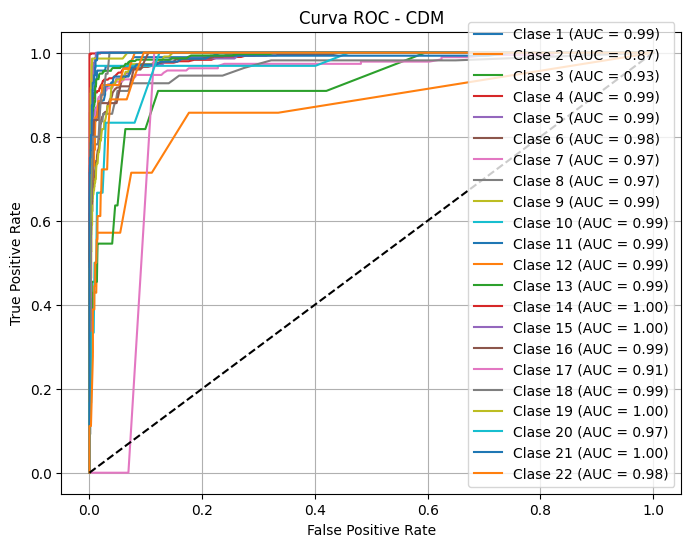

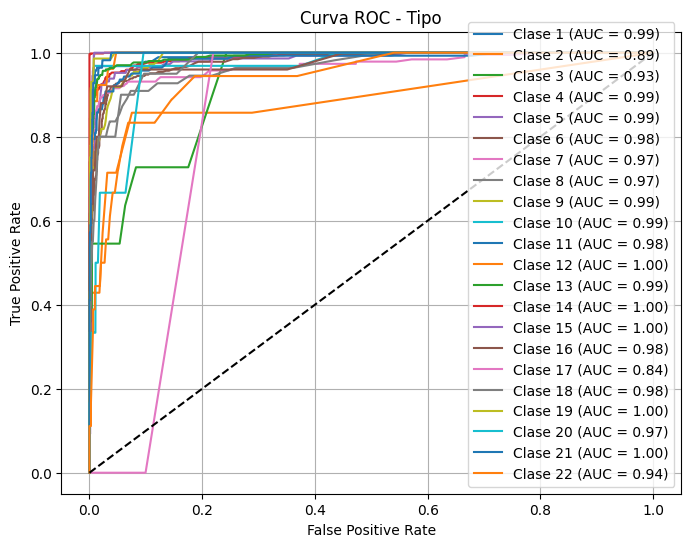

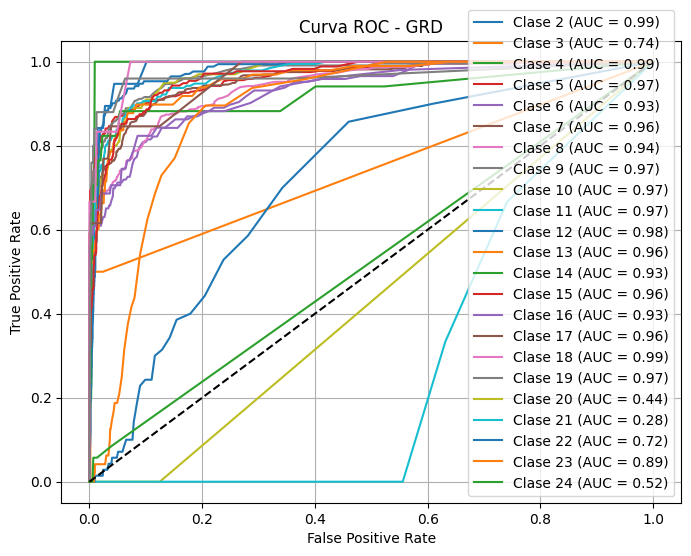

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
import numpy as np

y_cdm_pred_proba = rf_cdm.predict_proba(X_test_scaled)  # Salida del modelo y_cdm
y_tipo_pred_proba = rf_tipo.predict_proba(X_tipo_test)  # Salida del modelo y_tipo
y_grd_pred_proba = rf_grd.predict_proba(X_grd_test)

y_cdm_test_bin = label_binarize(y_cdm_test, classes=np.unique(y_cdm))
y_tipo_test_bin = label_binarize(y_tipo_test, classes=np.unique(y_tipo))
y_grd_test_bin = label_binarize(y_grd_test, classes=np.unique(y_grd))

# Nombres opcionales
output_labels = ['CDM', 'Tipo', 'GRD']
y_preds = [y_cdm_pred_proba, y_tipo_pred_proba, y_grd_pred_proba]
y_trues = [y_cdm_test_bin, y_tipo_test_bin, y_grd_test_bin]


for i, (y_true, y_pred) in enumerate(zip(y_trues, y_preds)):
    n_classes = y_true.shape[1]

    # Inicializar diccionarios para FPR, TPR y AUC
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # Calcular FPR, TPR para cada clase
    for j in range(n_classes):
        if len(np.unique(y_true[:, j])) < 2:  # Si solo hay una clase, no se puede calcular ROC
            continue
        fpr[j], tpr[j], _ = roc_curve(y_true[:, j], y_pred[:, j])
        roc_auc[j] = auc(fpr[j], tpr[j])

    # Plot ROC para cada clase
    plt.figure(figsize=(8, 6))
    for j in range(n_classes):
        if len(np.unique(y_true[:, j])) < 2:  # Si no hay clase positiva y negativa, no se puede trazar
            continue
        plt.plot(fpr[j], tpr[j], label=f'Clase {j+1} (AUC = {roc_auc[j]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')  # Línea diagonal
    plt.title(f'Curva ROC - {output_labels[i]}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

### SVM

In [ ]:
# SVM
svm = SVC(C=1, kernel='linear')
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)
print("SVM Report:")
print(classification_report(y_test, y_pred_svm, zero_division=0))

SVM Report:
              precision    recall  f1-score   support

       01411       0.00      0.00      0.00         0
       01413       0.00      0.00      0.00         3
       01414       0.75      0.88      0.81        41
       01415       0.00      0.00      0.00         0
       01416       0.00      0.00      0.00         5
       01417       0.00      0.00      0.00         1
       01421       0.00      0.00      0.00         1
       01422       0.43      0.25      0.32        12
       01423       1.00      0.80      0.89         5
       01424       0.47      0.76      0.58        21
       01425       0.00      0.00      0.00         2
       01426       0.00      0.00      0.00         3
       02130       0.00      0.00      0.00         1
       02410       0.00      0.00      0.00         1
       02412       0.00      0.00      0.00         5
       03120       0.00      0.00      0.00         2
       03411       0.00      0.00      0.00         0
       03413   

### KNN


In [ ]:
# KNN
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
print("KNN Report:")
print(classification_report(y_test, y_pred_knn, zero_division=0))

KNN Report:


'              precision    recall  f1-score   support\n\n       01410       0.00      0.00      0.00         0\n       01413       0.00      0.00      0.00         3\n       01414       0.17      0.34      0.23        41\n       01416       0.00      0.00      0.00         5\n       01417       0.00      0.00      0.00         1\n       01421       0.00      0.00      0.00         1\n       01422       0.00      0.00      0.00        12\n       01423       0.29      0.40      0.33         5\n       01424       0.25      0.52      0.34        21\n       01425       0.00      0.00      0.00         2\n       01426       0.00      0.00      0.00         3\n       02130       0.00      0.00      0.00         1\n       02410       0.00      0.00      0.00         1\n       02412       0.00      0.00      0.00         5\n       03120       0.00      0.00      0.00         2\n       03413       0.00      0.00      0.00         5\n       03414       0.00      0.00      0.00         2\n       